In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics
from sklearn import preprocessing
import torch.nn as nn
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from tqdm.auto import tqdm

import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib
from matplotlib.ticker import MaxNLocator

from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
from pytorch_lightning.loggers import TensorBoardLogger
from torchmetrics.functional import accuracy

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from multiprocessing import cpu_count
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

C:\Users\Ahmad\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: [WinError 127] The specified procedure could not be found
  warn(f"Failed to load image Python extension: {e}")


In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 14, 10

tqdm.pandas()

In [119]:
df = pd.read_csv("Oscilloscope Combined.csv")

# Plotting the number of instances for each category!

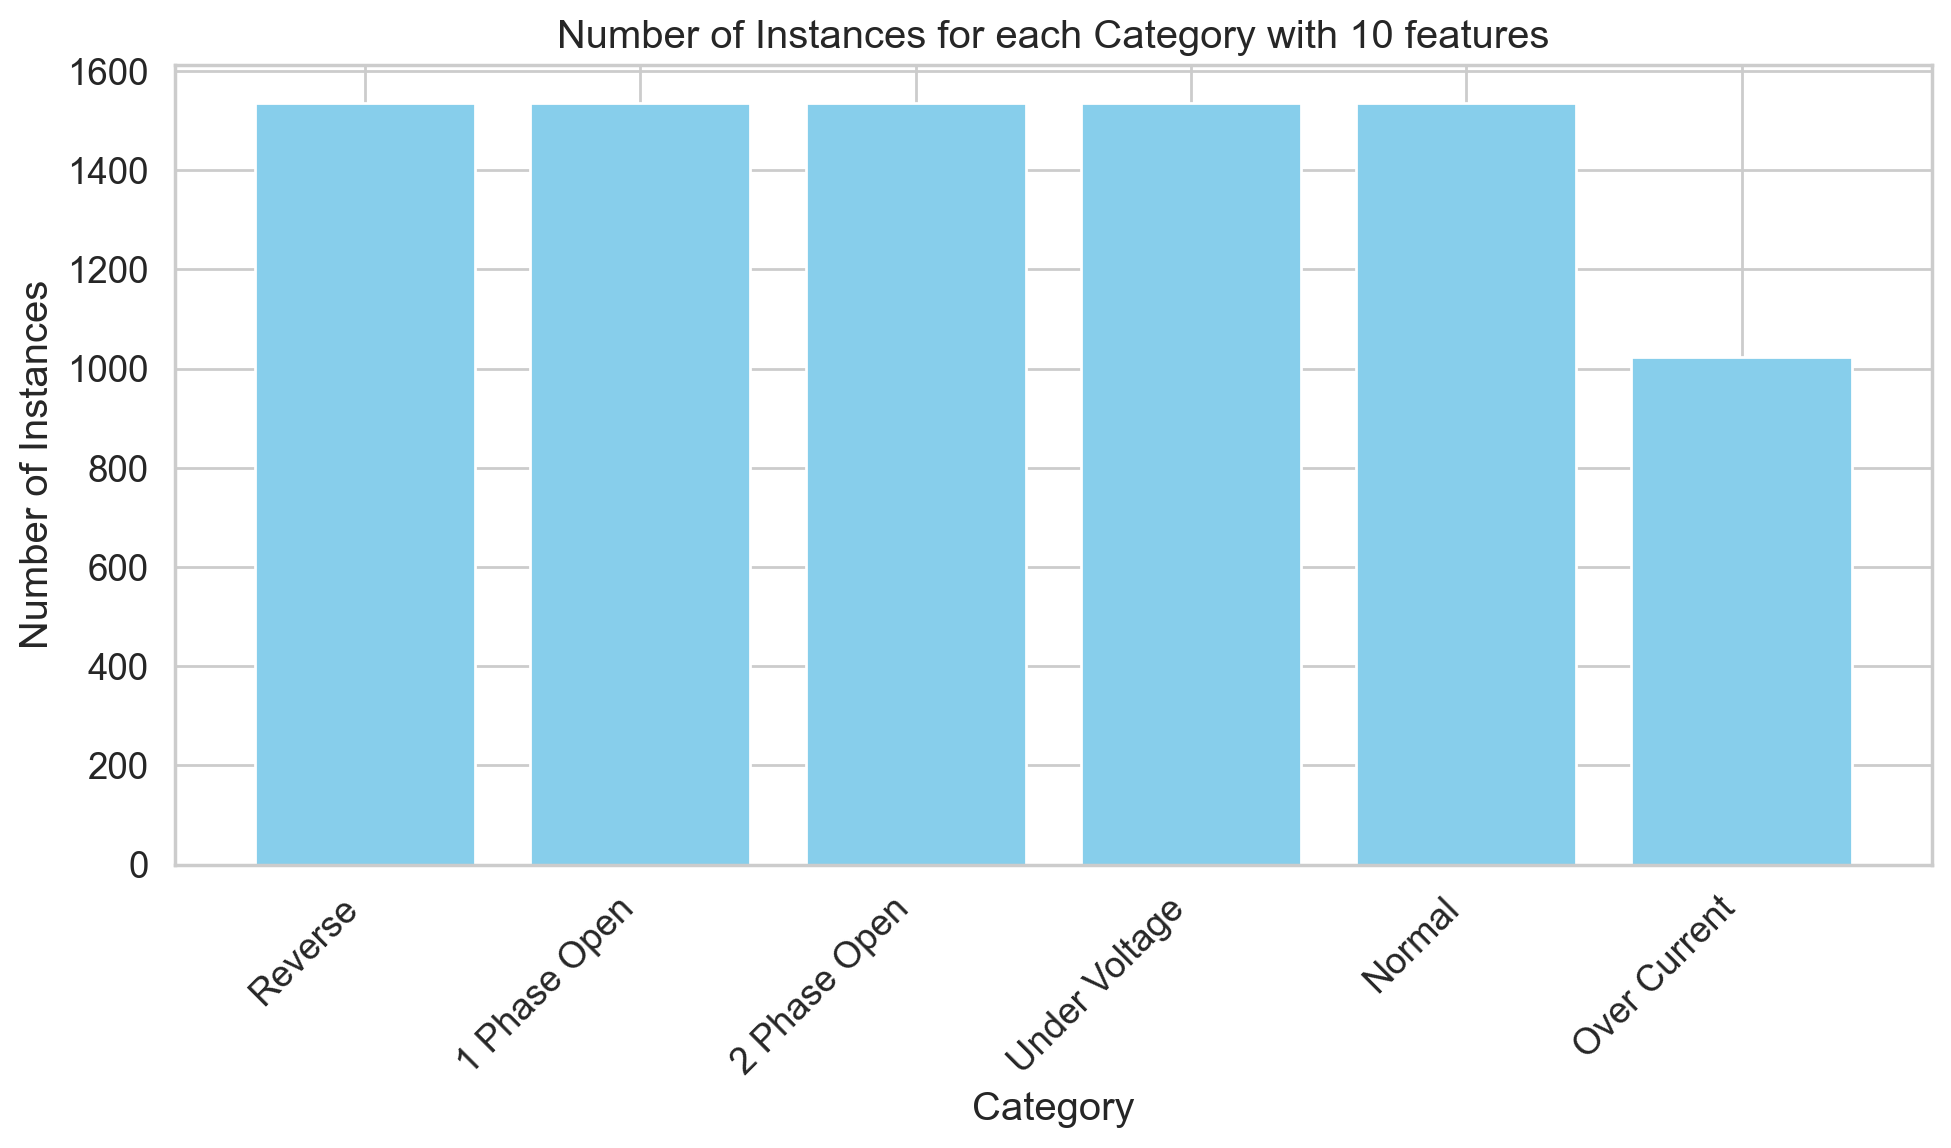

In [120]:
num_features = len(df.columns) - 1  # Assuming the last column is the label
label_counts = df['Category'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(label_counts.index, label_counts.values, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Number of Instances')
plt.title(f'Number of Instances for each Category with {num_features} features')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

# Plotting all sin - E1 against Time

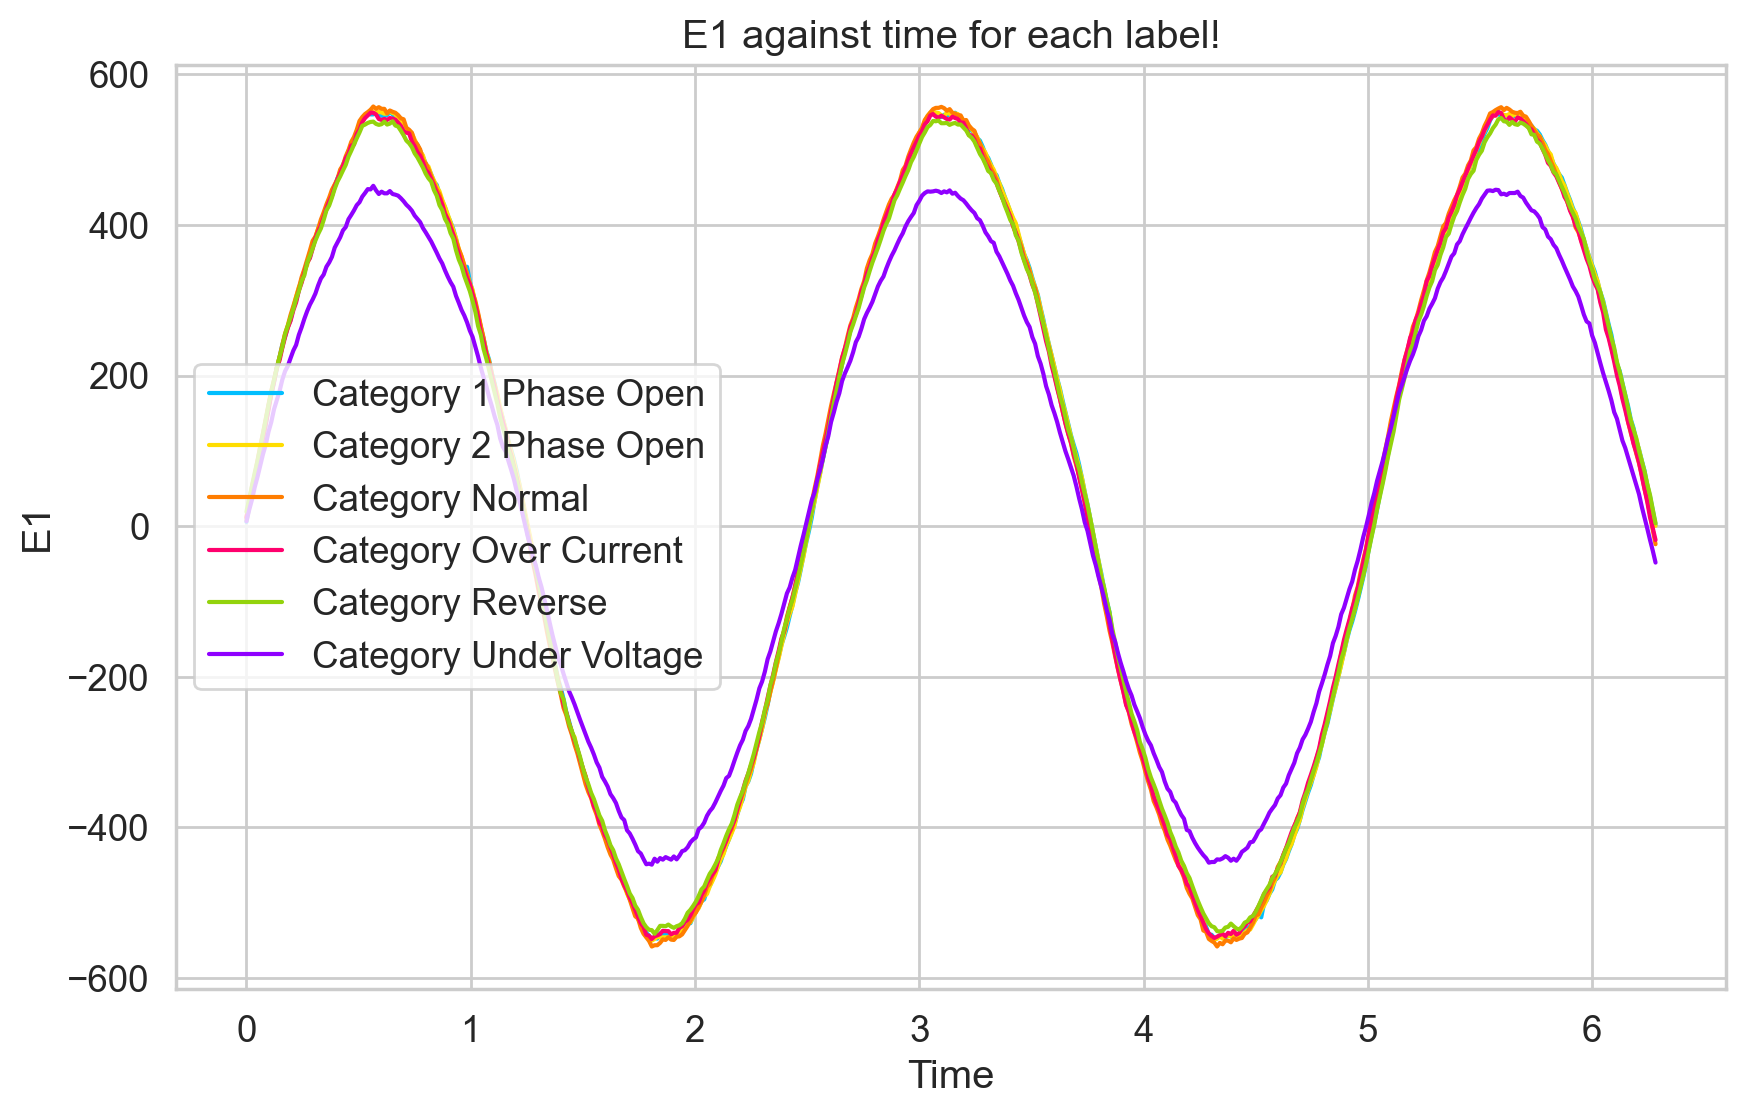

In [121]:
# Take the first 512 values for each label
subset_df = df.groupby('Category').head(512)

# Generate time values
num_readings = 512
time = np.linspace(0, 2 * np.pi, num_readings)  # Assuming one period of the sinusoid

# Plotting each group separately
plt.figure(figsize=(10, 6))
for label, group in subset_df.groupby('Category'):
    plt.plot(time, group['E1'], label=f'Category {label}')

plt.xlabel('Time')
plt.ylabel('E1')
plt.title('E1 against time for each label!')
plt.legend()
plt.grid(True)
plt.show()

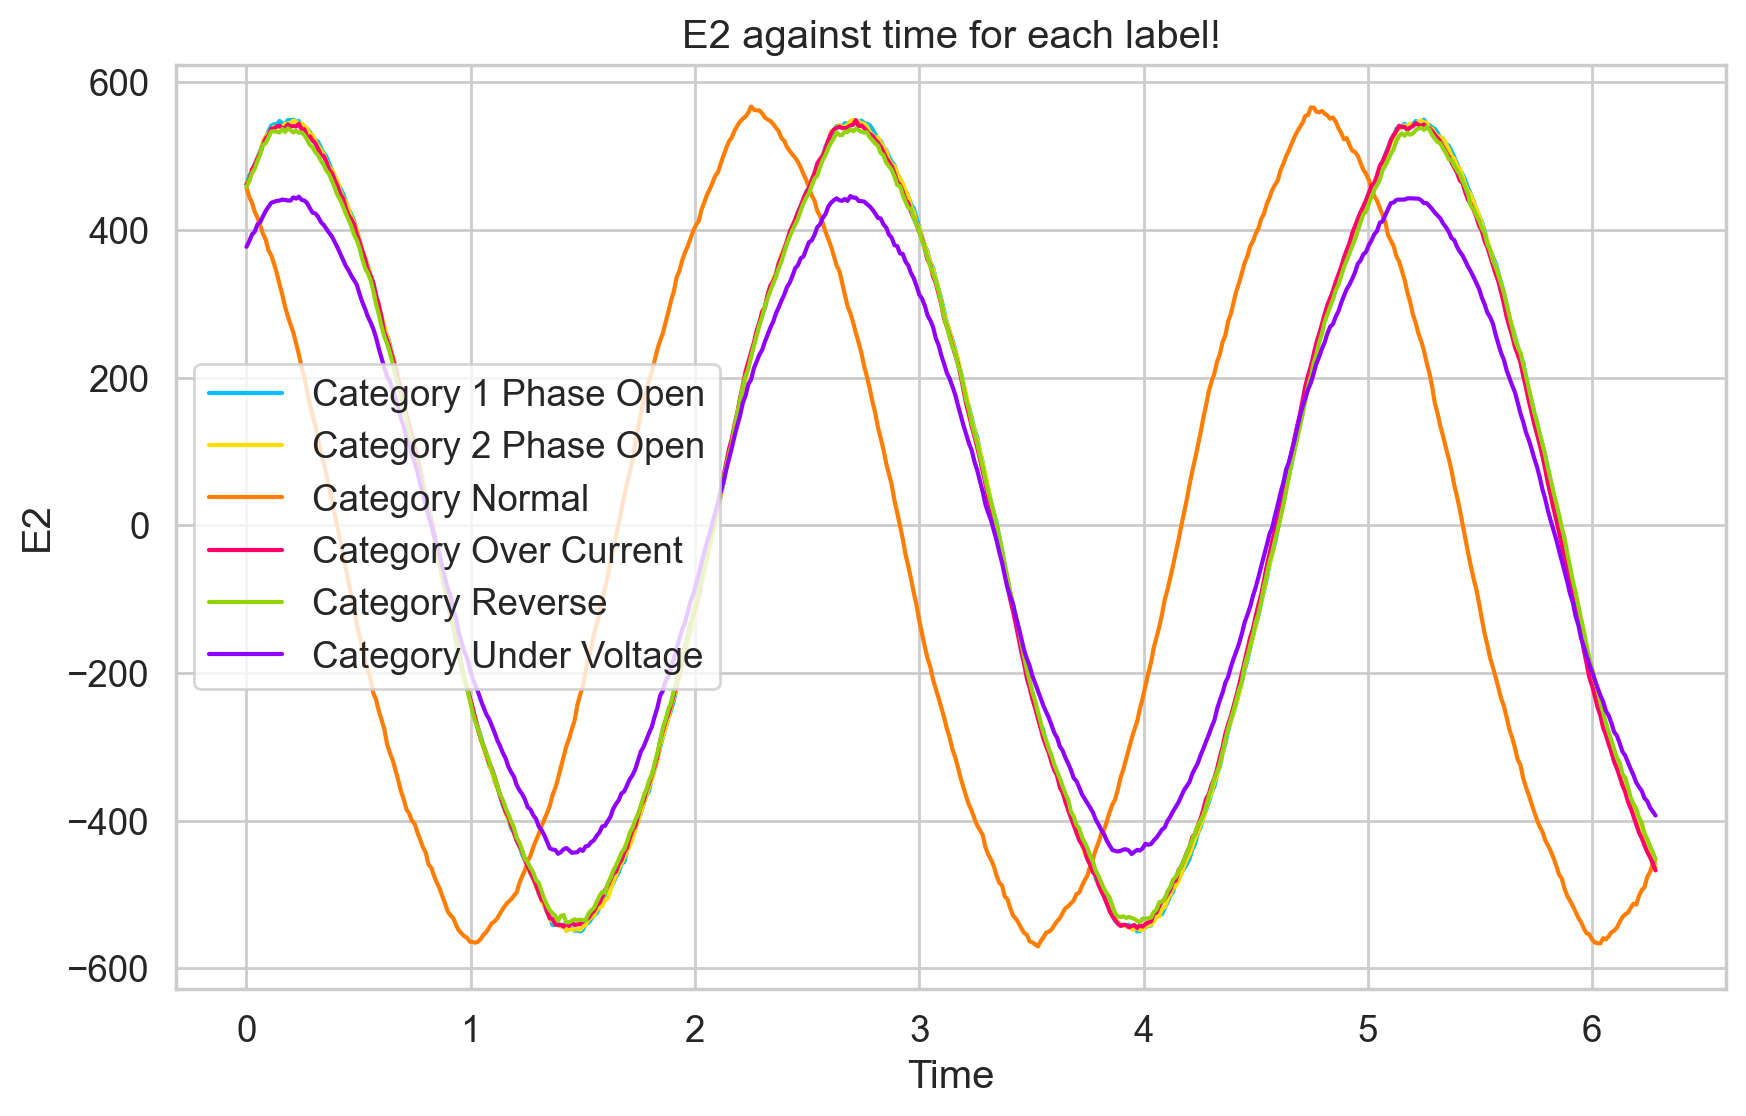

In [122]:
# Take the first 512 values for each label
subset_df = df.groupby('Category').head(512)

# Generate time values
num_readings = 512
time = np.linspace(0, 2 * np.pi, num_readings)  # Assuming one period of the sinusoid

# Plotting each group separately
plt.figure(figsize=(10, 6))
for label, group in subset_df.groupby('Category'):
    plt.plot(time, group['E2'], label=f'Category {label}')

plt.xlabel('Time')
plt.ylabel('E2')
plt.title('E2 against time for each label!')
plt.legend()
plt.grid(True)
plt.show()

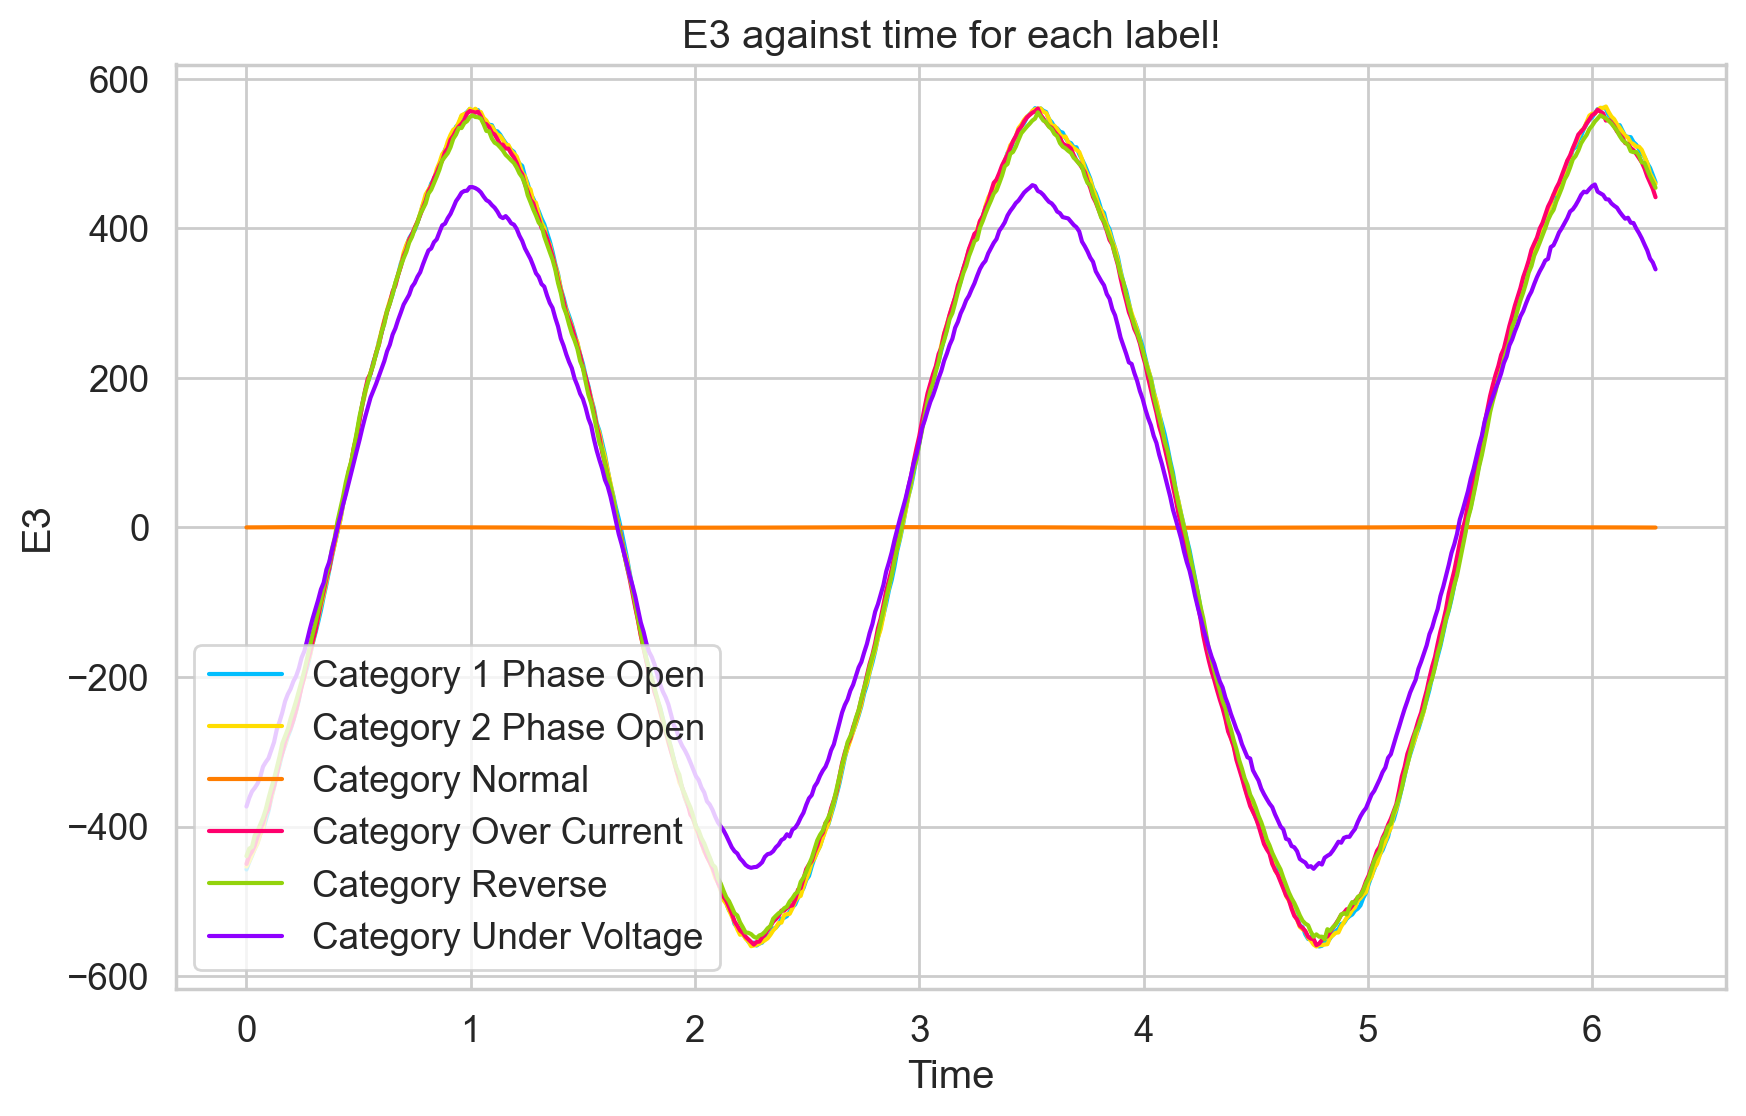

In [123]:
# Take the first 512 values for each label
subset_df = df.groupby('Category').head(512)

# Generate time values
num_readings = 512
time = np.linspace(0, 2 * np.pi, num_readings)  # Assuming one period of the sinusoid

# Plotting each group separately
plt.figure(figsize=(10, 6))
for label, group in subset_df.groupby('Category'):
    plt.plot(time, group['E3'], label=f'Category {label}')

plt.xlabel('Time')
plt.ylabel('E3')
plt.title('E3 against time for each label!')
plt.legend()
plt.grid(True)
plt.show()

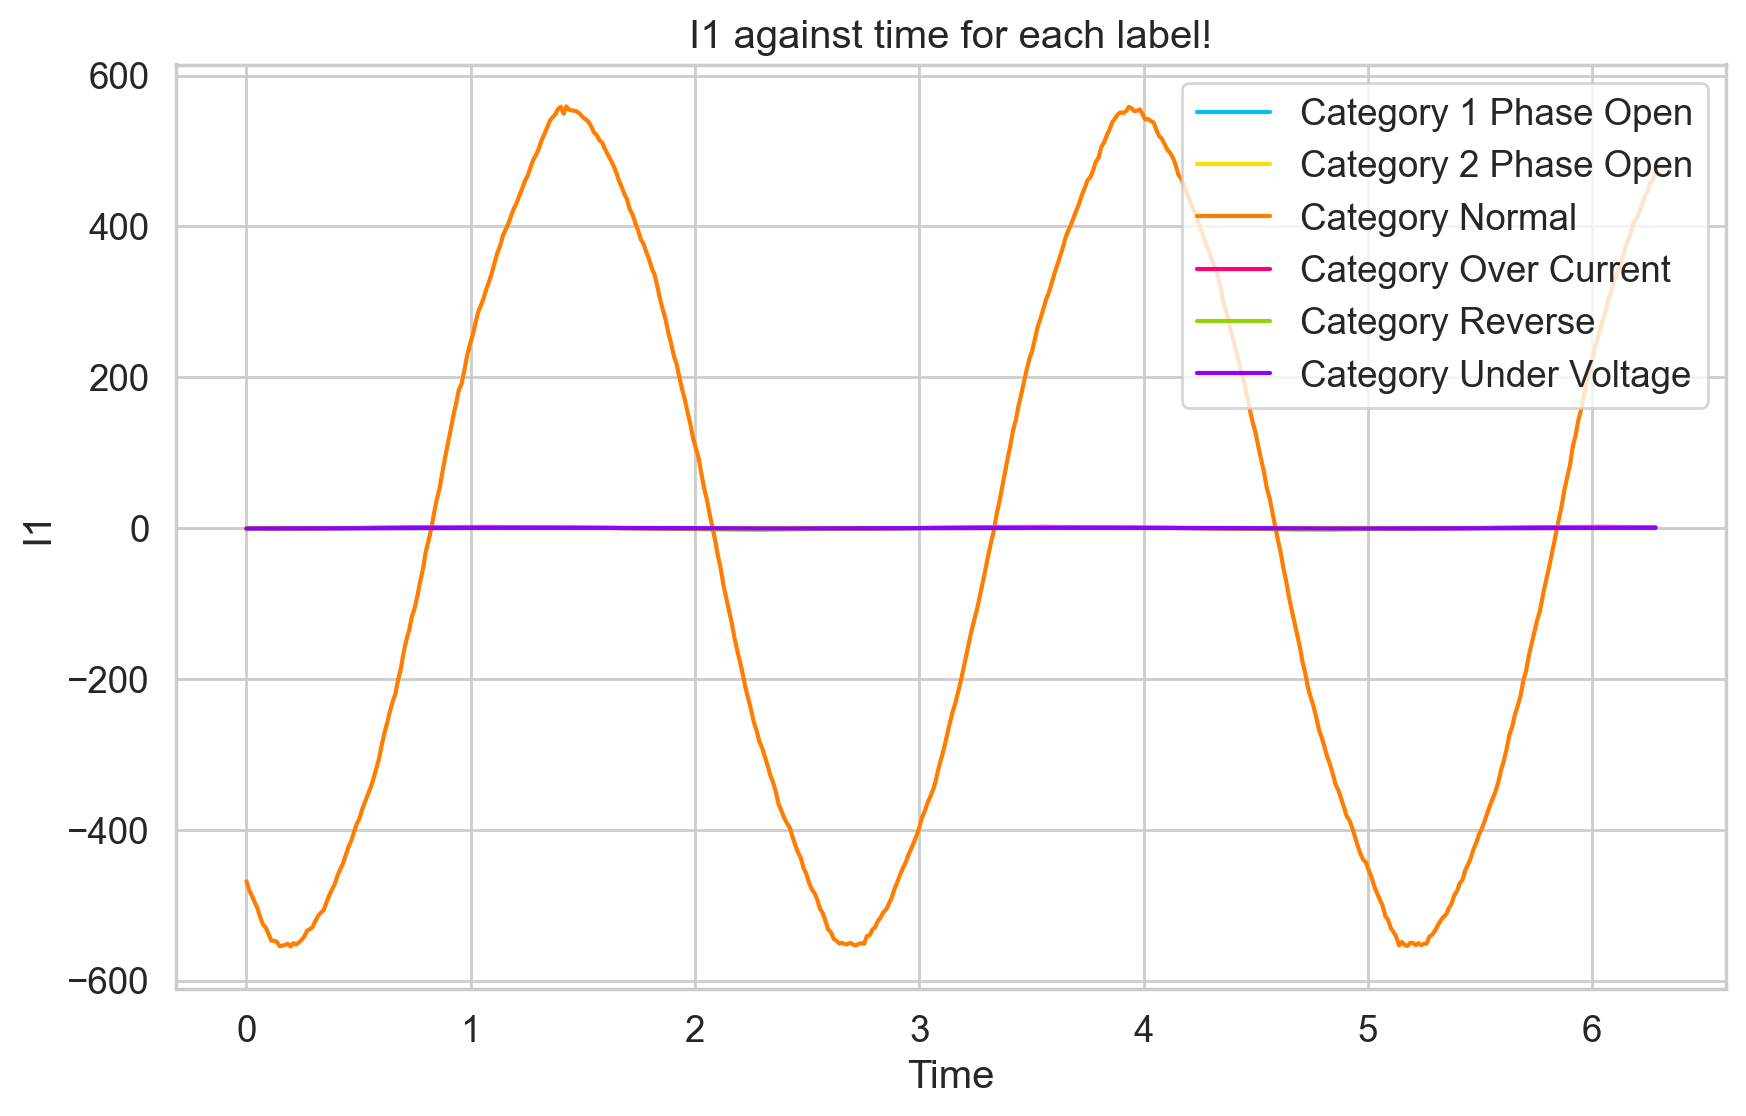

In [124]:
# Take the first 512 values for each label
subset_df = df.groupby('Category').head(512)

# Generate time values
num_readings = 512
time = np.linspace(0, 2 * np.pi, num_readings)  # Assuming one period of the sinusoid

# Plotting each group separately
plt.figure(figsize=(10, 6))
for label, group in subset_df.groupby('Category'):
    plt.plot(time, group['I1'], label=f'Category {label}')

plt.xlabel('Time')
plt.ylabel('I1')
plt.title('I1 against time for each label!')
plt.legend()
plt.grid(True)
plt.show()

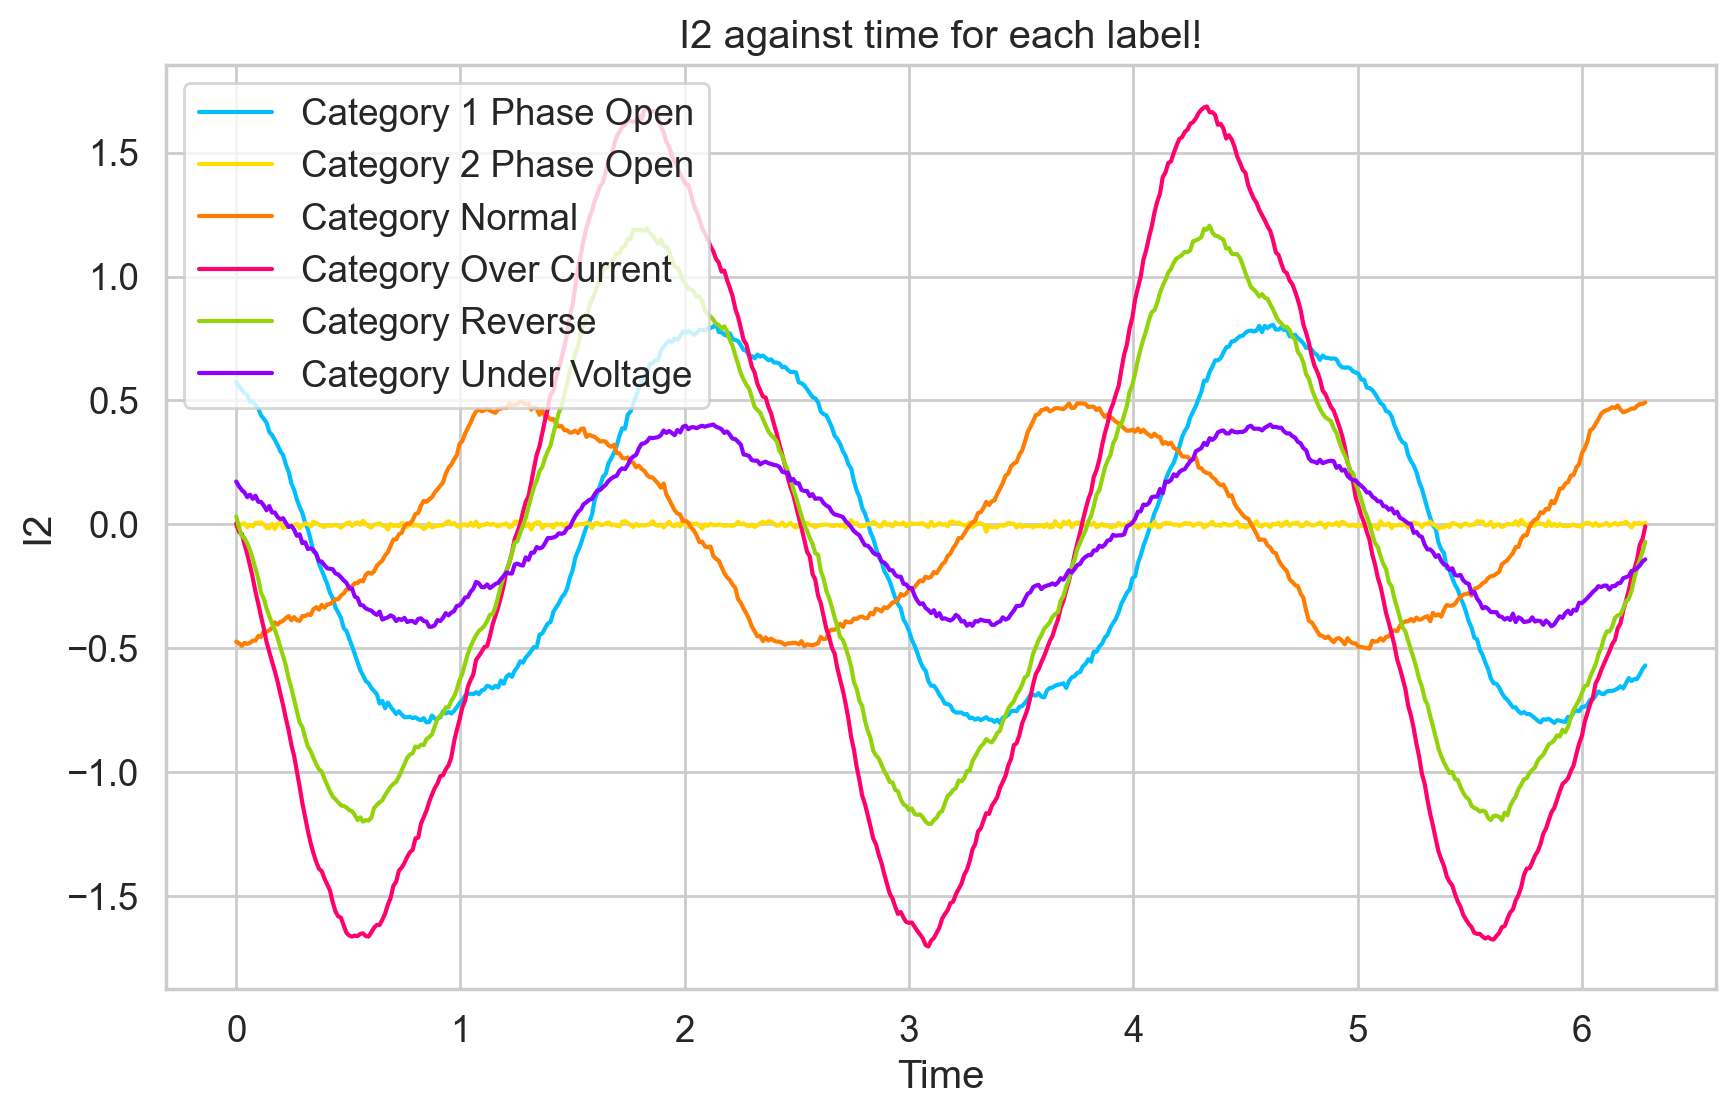

In [125]:
# Take the first 512 values for each label
subset_df = df.groupby('Category').head(512)

# Generate time values
num_readings = 512
time = np.linspace(0, 2 * np.pi, num_readings)  # Assuming one period of the sinusoid

# Plotting each group separately
plt.figure(figsize=(10, 6))
for label, group in subset_df.groupby('Category'):
    plt.plot(time, group['I2'], label=f'Category {label}')

plt.xlabel('Time')
plt.ylabel('I2')
plt.title('I2 against time for each label!')
plt.legend()
plt.grid(True)
plt.show()

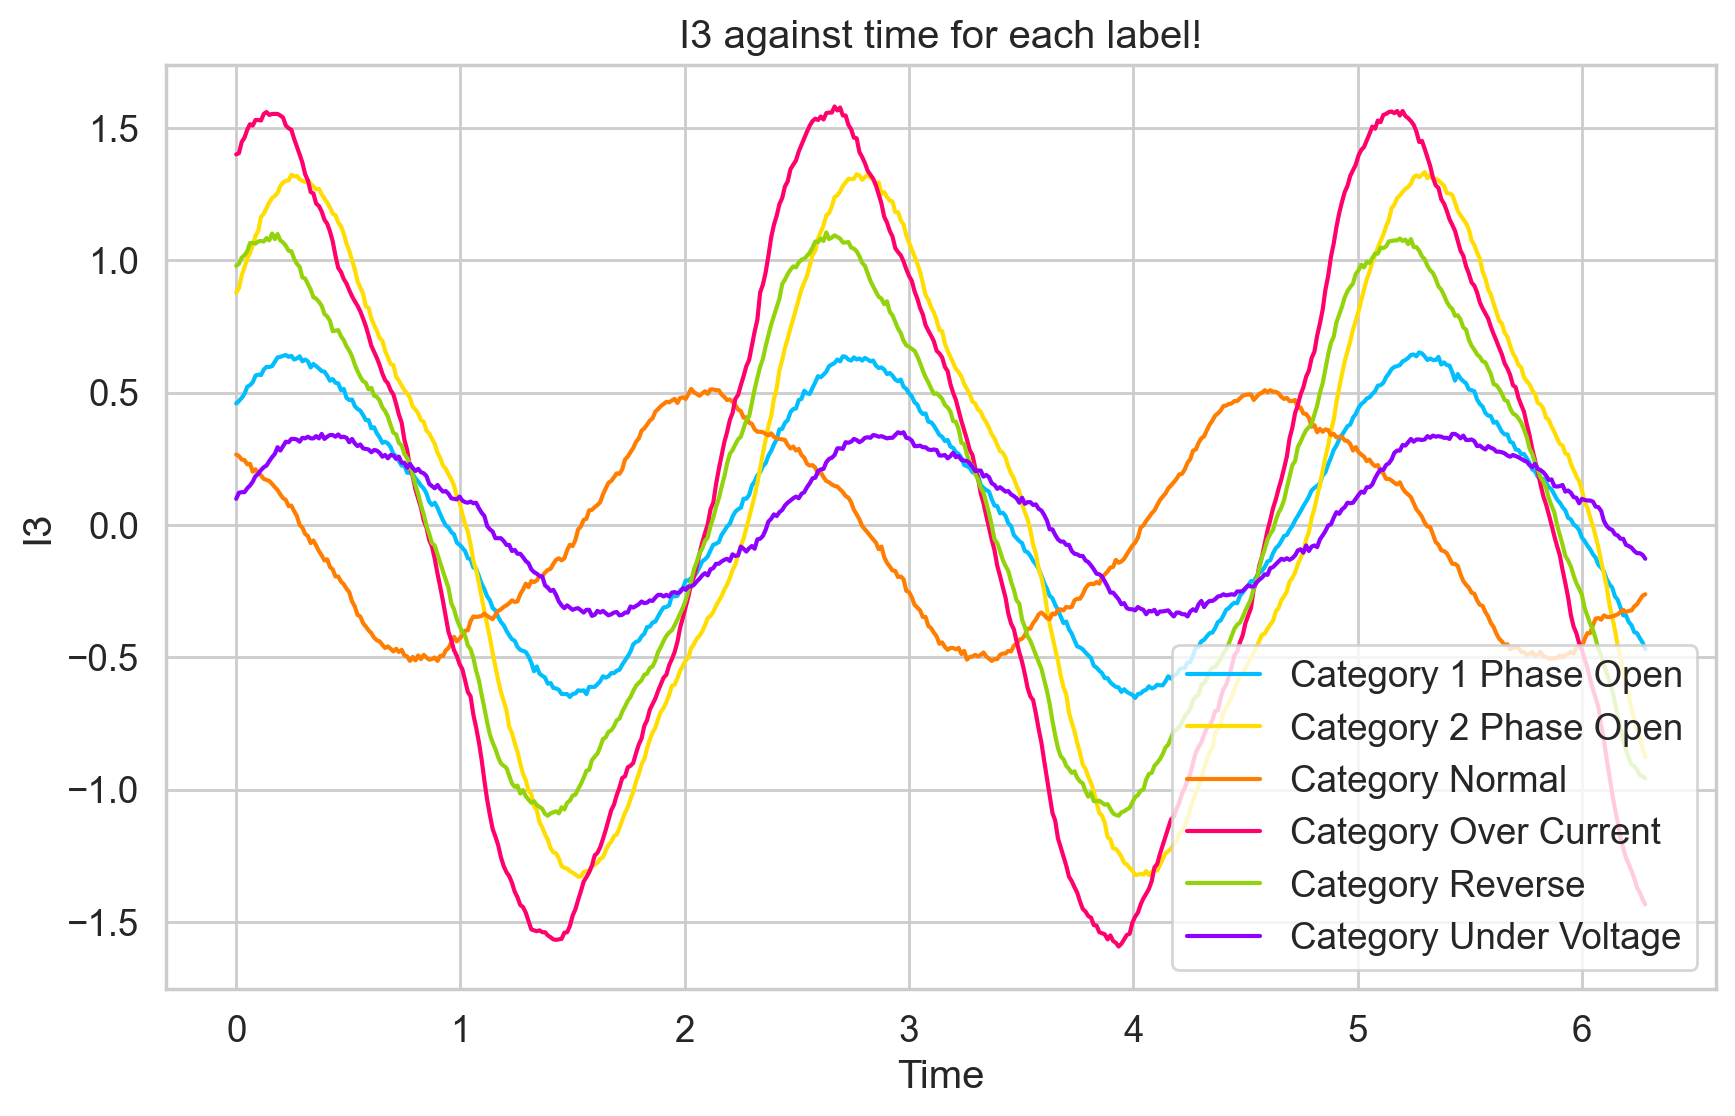

In [126]:
# Take the first 512 values for each label
subset_df = df.groupby('Category').head(512)

# Generate time values
num_readings = 512
time = np.linspace(0, 2 * np.pi, num_readings)  # Assuming one period of the sinusoid

# Plotting each group separately
plt.figure(figsize=(10, 6))
for label, group in subset_df.groupby('Category'):
    plt.plot(time, group['I3'], label=f'Category {label}')

plt.xlabel('Time')
plt.ylabel('I3')
plt.title('I3 against time for each label!')
plt.legend()
plt.grid(True)
plt.show()

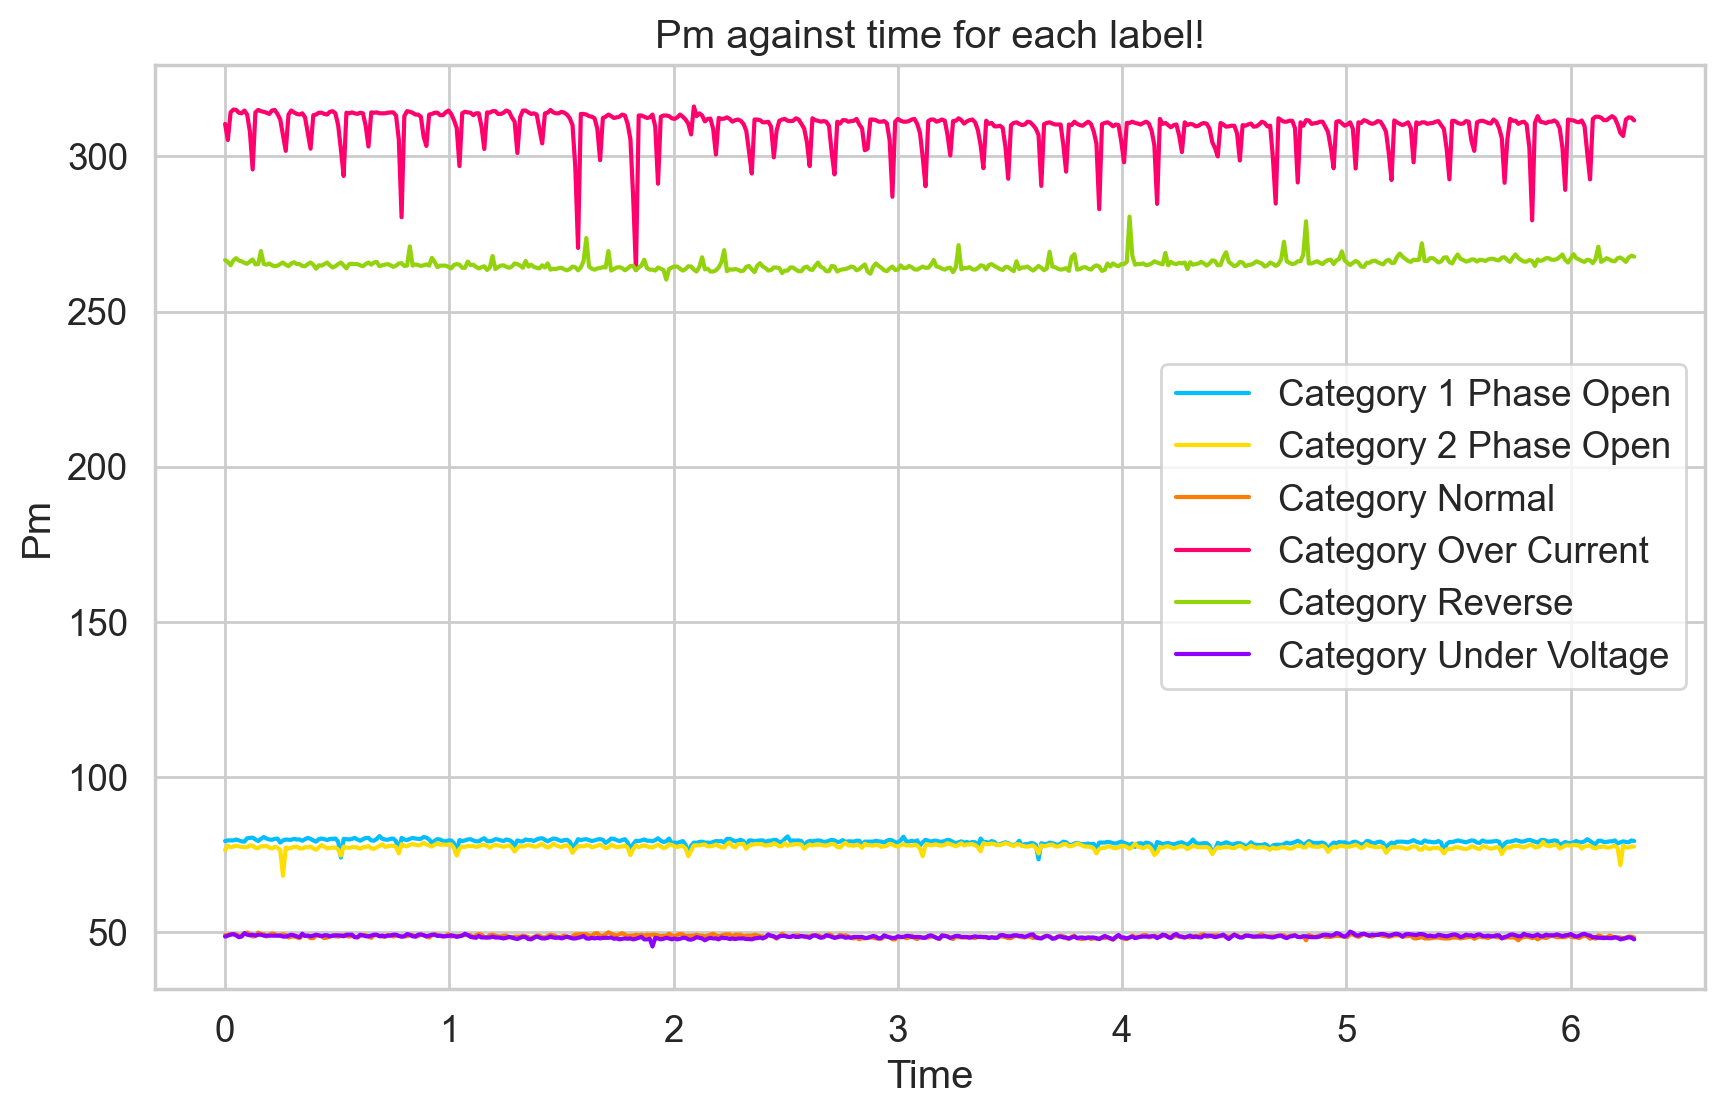

In [127]:
# Take the first 512 values for each label
subset_df = df.groupby('Category').head(512)

# Generate time values
num_readings = 512
time = np.linspace(0, 2 * np.pi, num_readings)  # Assuming one period of the sinusoid

# Plotting each group separately
plt.figure(figsize=(10, 6))
for label, group in subset_df.groupby('Category'):
    plt.plot(time, group['Pm'], label=f'Category {label}')

plt.xlabel('Time')
plt.ylabel('Pm')
plt.title('Pm against time for each label!')
plt.legend()
plt.grid(True)
plt.show()

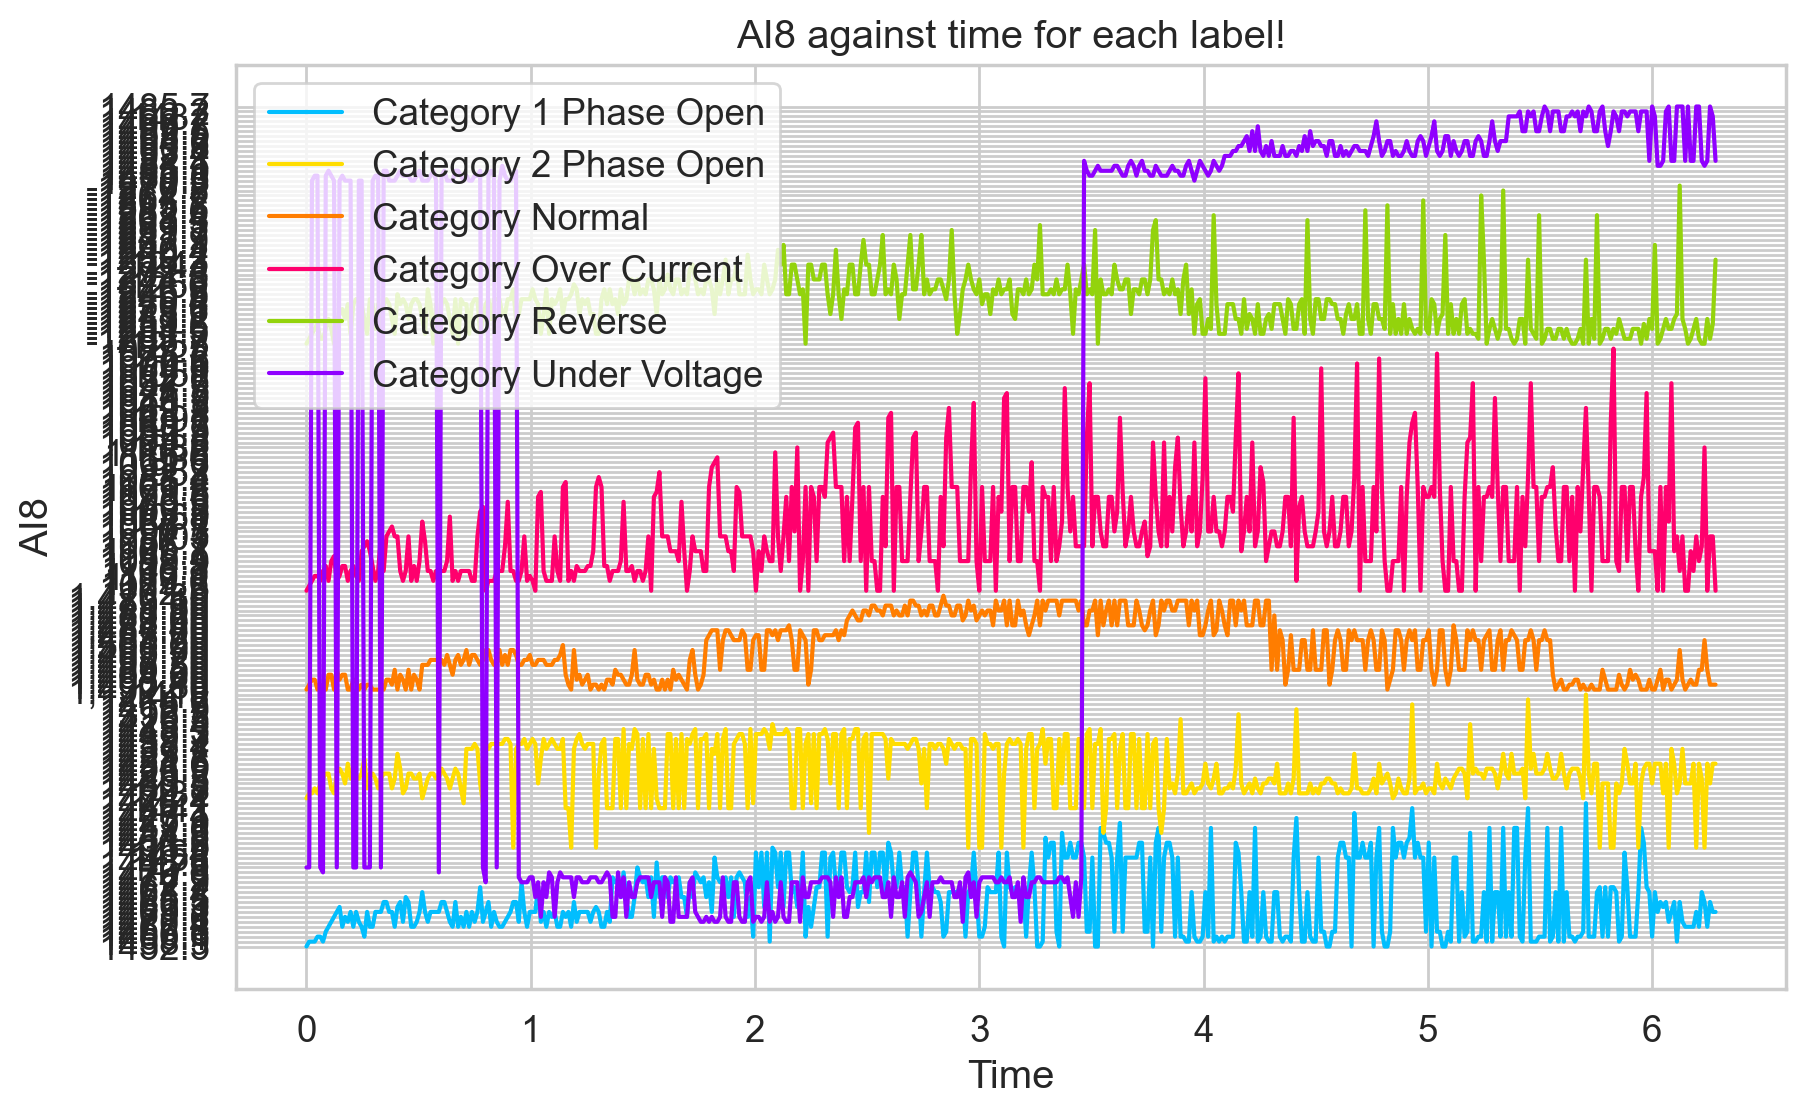

In [128]:
# Take the first 512 values for each label
subset_df = df.groupby('Category').head(512)

# Generate time values
num_readings = 512
time = np.linspace(0, 2 * np.pi, num_readings)  # Assuming one period of the sinusoid

# Plotting each group separately
plt.figure(figsize=(10, 6))
for label, group in subset_df.groupby('Category'):
    plt.plot(time, group['AI8'], label=f'Category {label}')

plt.xlabel('Time')
plt.ylabel('AI8')
plt.title('AI8 against time for each label!')
plt.legend()
plt.grid(True)
plt.show()

# Data Preprocessing

In [13]:
df.dropna(inplace=True) #Drop NA Vals
missing_values_count = df.isnull().sum()                # Get the number of missing data points per column
missing_values_count[0:10]

Time      0
E1        0
I1        0
E2        0
I2        0
E3        0
I3        0
AI8       0
Pm        0
Torque    0
dtype: int64

In [14]:
df['Torque'] = df['Torque'].replace('no load', 0)


# Decision Tree (This is most likely not work)

In [15]:
df

Time     E1     I1     E2     I2     E3     I3     AI8     Pm Torque  \
0      0.000  19.1 -0.904  458.3  0.032 -439.5  0.979 -1257.0  266.6     -2   
1      0.098  36.1 -0.898  466.1 -0.011 -429.5  0.987 -1255.7  266.0     -2   
2      0.195  53.5 -0.877  477.0 -0.048 -427.3  1.010 -1251.9  264.9     -2   
3      0.293  70.9 -0.837  483.0 -0.055 -412.0  1.019 -1254.5  266.5     -2   
4      0.391  86.1 -0.816  493.5 -0.076 -406.3  1.034 -1259.6  267.2     -2   
...      ...   ...    ...    ...    ...    ...    ...     ...    ...    ...   
7163  49.512  42.2  1.895 -346.1 -0.403  386.7 -1.589   376.9   76.3      2   
7164  49.609  30.5  1.876 -355.7 -0.356  379.7 -1.644   274.7   57.9      2   
7165  49.707  14.4  1.849 -361.3 -0.293  374.0 -1.686   399.8   84.4      2   
7166  49.805  -1.3  1.790 -364.8 -0.234  365.3 -1.742   399.8   84.4      2   
7167  49.902 -15.2  1.769 -372.6 -0.183  357.4 -1.797   397.3   83.7      2   

           Category  
0           Reverse  
1           Reverse  
2           Reverse  
3           Reverse  
4           Reverse  
...             ...  
7163  Under Voltage  
7164  Under Voltage  
7165  Under Voltage  
7166  Under Voltage  
7167  Under Voltage  

[7168 rows x 11 columns]

In [16]:
x = df.iloc[:]
x = x.drop("Category", axis=1)
x = x.astype(float)
y = pd.get_dummies(df['Category'], prefix='Category')
y= y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report

# create a decision tree classifier
clf = DecisionTreeClassifier()

# define the parameter grid to search over
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# create a grid search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best score:  0.9966868574367307


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       308
           1       1.00      1.00      1.00       302
           2       1.00      1.00      1.00       185
           3       1.00      1.00      1.00       337
           4       1.00      0.99      0.99       302

   micro avg       1.00      1.00      1.00      1434
   macro avg       1.00      1.00      1.00      1434
weighted avg       1.00      1.00      1.00      1434
 samples avg       1.00      1.00      1.00      1434



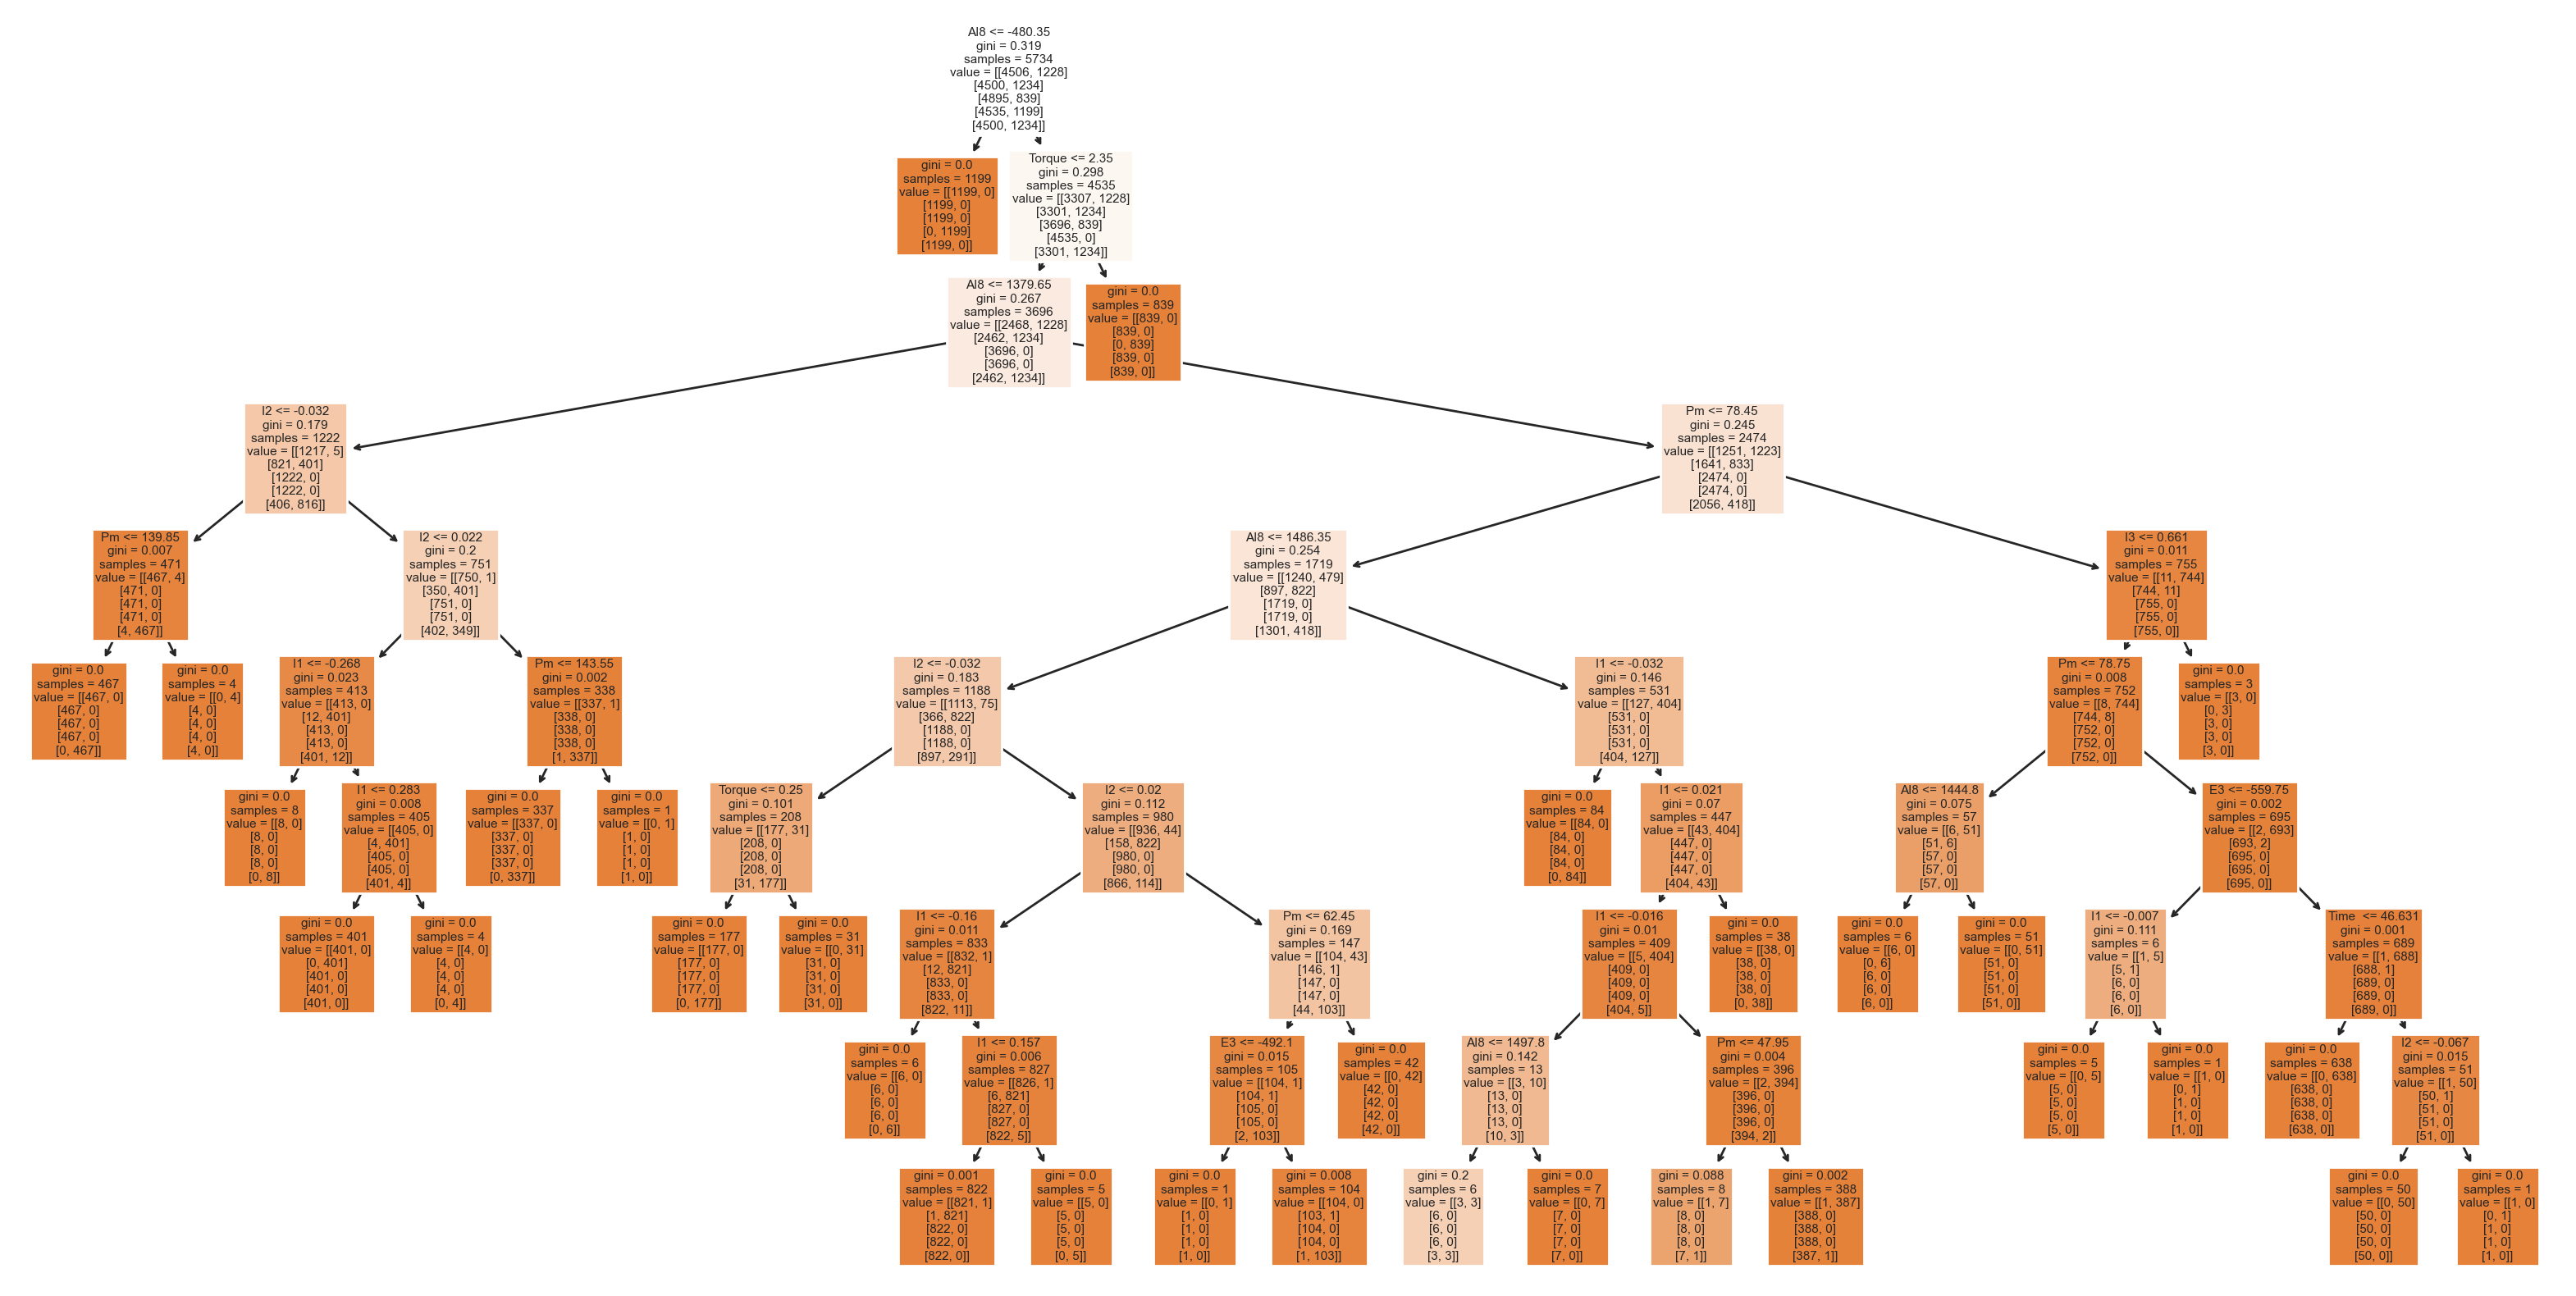

In [18]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# create a decision tree classifier
clf = DecisionTreeClassifier(max_depth= 9, min_samples_leaf= 1, min_samples_split= 5)

# fit the classifier to the training data
clf.fit(X_train, y_train)

# make predictions on the testing data
y_pred = clf.predict(X_test)

# print the classification report
report = classification_report(y_test, y_pred, zero_division=1)

print(report)

# plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X_test.columns)
plt.show()

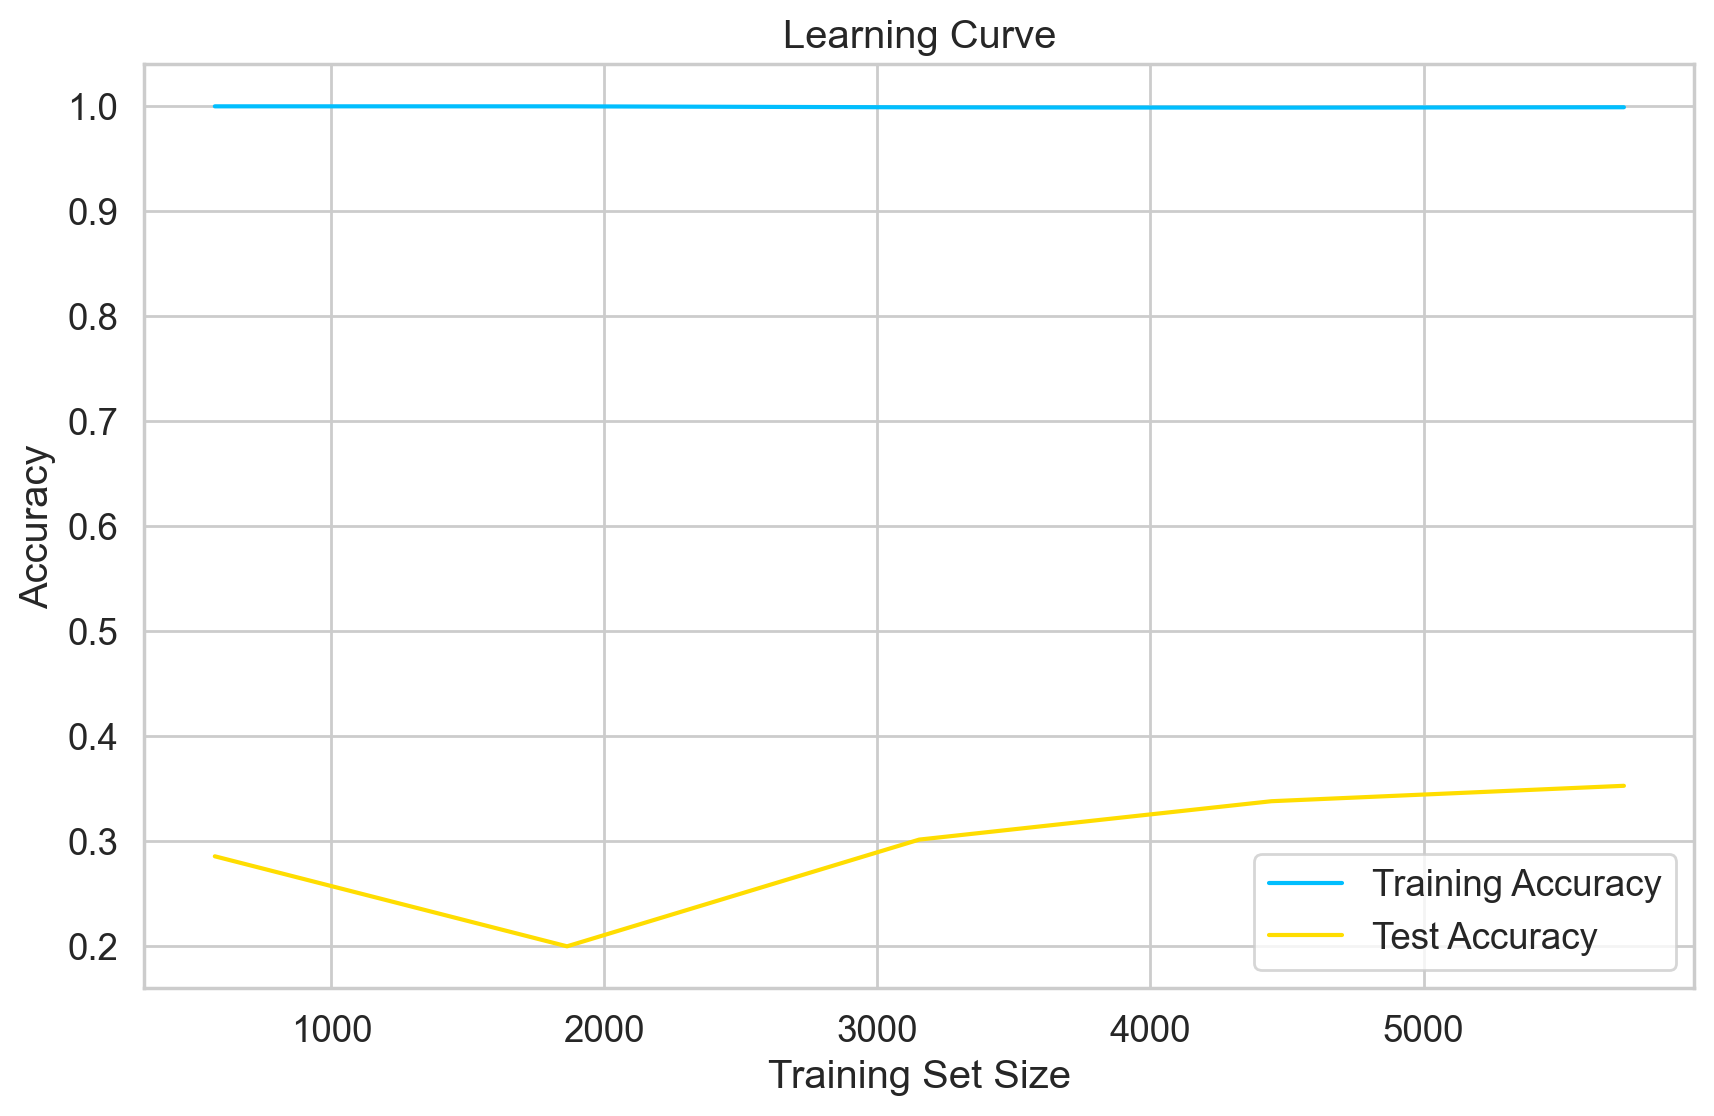

In [19]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(clf, x, y, cv=5)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()


# Now we try LSTMs.

In [20]:
# Check the GPU that we have
!nvidia-smi

Tue Dec  5 14:55:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.78       Driver Version: 512.78       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   36C    P8     6W /  N/A |      0MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [21]:
x = df.iloc[:]
x = x.drop("Category", axis=1)
x = x.astype(float)
x

Time     E1     I1     E2     I2     E3     I3     AI8     Pm  Torque
0      0.000  19.1 -0.904  458.3  0.032 -439.5  0.979 -1257.0  266.6    -2.0
1      0.098  36.1 -0.898  466.1 -0.011 -429.5  0.987 -1255.7  266.0    -2.0
2      0.195  53.5 -0.877  477.0 -0.048 -427.3  1.010 -1251.9  264.9    -2.0
3      0.293  70.9 -0.837  483.0 -0.055 -412.0  1.019 -1254.5  266.5    -2.0
4      0.391  86.1 -0.816  493.5 -0.076 -406.3  1.034 -1259.6  267.2    -2.0
...      ...   ...    ...    ...    ...    ...    ...     ...    ...     ...
7163  49.512  42.2  1.895 -346.1 -0.403  386.7 -1.589   376.9   76.3     2.0
7164  49.609  30.5  1.876 -355.7 -0.356  379.7 -1.644   274.7   57.9     2.0
7165  49.707  14.4  1.849 -361.3 -0.293  374.0 -1.686   399.8   84.4     2.0
7166  49.805  -1.3  1.790 -364.8 -0.234  365.3 -1.742   399.8   84.4     2.0
7167  49.902 -15.2  1.769 -372.6 -0.183  357.4 -1.797   397.3   83.7     2.0

[7168 rows x 10 columns]

In [97]:
def time_series(df):
    features = ['E1', 'E2', 'E3', 'I1','I2','I3','Pm','AI8']
    target_column = 'Category'

    X = (df[features] - df[features].mean()) / df[features].std()
    
    #X = X.assign(column_to_add=df['Torque'])
    
    label_encoder = LabelEncoder()
    Y = label_encoder.fit_transform(df[target_column])

    X = X.values
    X = X.astype(float)
    Y = Y.astype(float)

    print("X shape:", X.shape)
    print("y shape:", y.shape)

    return X, Y, label_encoder

# Example Usage:
# Assuming df is your DataFrame with the provided time series data
# Modify this based on your actual DataFrame structure
# X, y, label_encoder = time_series_classification(df)


In [115]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense, BatchNormalization, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from sklearn.model_selection import train_test_split

X, y, label_encoder = time_series(df)

# Split the data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4)

# Split the temporary test set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

# Reshape your input data to have the shape (batch_size, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Print the reshaped shapes
print("X_train shape (reshaped):", X_train.shape)
print("X_test shape (reshaped):", X_test.shape)

# Print the reshaped shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X shape:", X.shape)
print("y shape:", y.shape)
print(X_train.shape)

# Define input layer
inputs = Input(shape=(None, X.shape[1]))

# Build the model using the Functional API
x = LSTM(units=10, return_sequences=True)(inputs)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = LSTM(units=10, return_sequences=True)(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = LSTM(units=10)(x)
outputs = Dense(units=5, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Set your custom learning rate parameters
initial_learning_rate = 0.001
decay_steps = 1
decay_rate = 0.9
clip_value = 1.0  # Adjust as needed

# Create a learning rate schedule
learning_rate_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=decay_steps, decay_rate=decay_rate, staircase=True
)

# Create the optimizer with gradient clipping using clipvalue
optimizer = Adam(
    learning_rate=learning_rate_schedule,
    clipvalue=clip_value
)

# Compile your model with the custom optimizer and sparse categorical crossentropy
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


X shape: (7168, 8)
y shape: (7168,)
X_train shape (reshaped): (4300, 1, 8)
X_test shape (reshaped): (1434, 1, 8)
X_train shape: (4300, 1, 8)
X_test shape: (1434, 1, 8)
X shape: (7168, 8)
y shape: (7168,)
(4300, 1, 8)


In [116]:
model.summary()


Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, None, 8)]         0         
                                                                 
 lstm_44 (LSTM)              (None, None, 10)          760       
                                                                 
 batch_normalization_34 (Bat  (None, None, 10)         40        
 chNormalization)                                                
                                                                 
 dropout_28 (Dropout)        (None, None, 10)          0         
                                                                 
 lstm_45 (LSTM)              (None, None, 10)          840       
                                                                 
 batch_normalization_35 (Bat  (None, None, 10)         40        
 chNormalization)                                         

Epoch 1/20
135/135 [==============================] - 6s 10ms/step - loss: 1.5024 - accuracy: 0.3712 - val_loss: 1.5625 - val_accuracy: 0.4435
Epoch 2/20
135/135 [==============================] - 1s 4ms/step - loss: 1.1852 - accuracy: 0.5419 - val_loss: 1.2027 - val_accuracy: 0.6464
Epoch 3/20
135/135 [==============================] - 0s 4ms/step - loss: 0.9376 - accuracy: 0.5967 - val_loss: 0.8236 - val_accuracy: 0.6681
Epoch 4/20
135/135 [==============================] - 0s 4ms/step - loss: 0.8164 - accuracy: 0.6321 - val_loss: 0.6966 - val_accuracy: 0.7211
Epoch 5/20
135/135 [==============================] - 0s 3ms/step - loss: 0.7416 - accuracy: 0.6670 - val_loss: 0.6244 - val_accuracy: 0.6904
Epoch 6/20
135/135 [==============================] - 0s 4ms/step - loss: 0.6767 - accuracy: 0.6940 - val_loss: 0.5342 - val_accuracy: 0.7908
Epoch 7/20
135/135 [==============================] - 1s 4ms/step - loss: 0.6498 - accuracy: 0.7053 - val_loss: 0.4733 - val_accuracy: 0.8438
Epoch

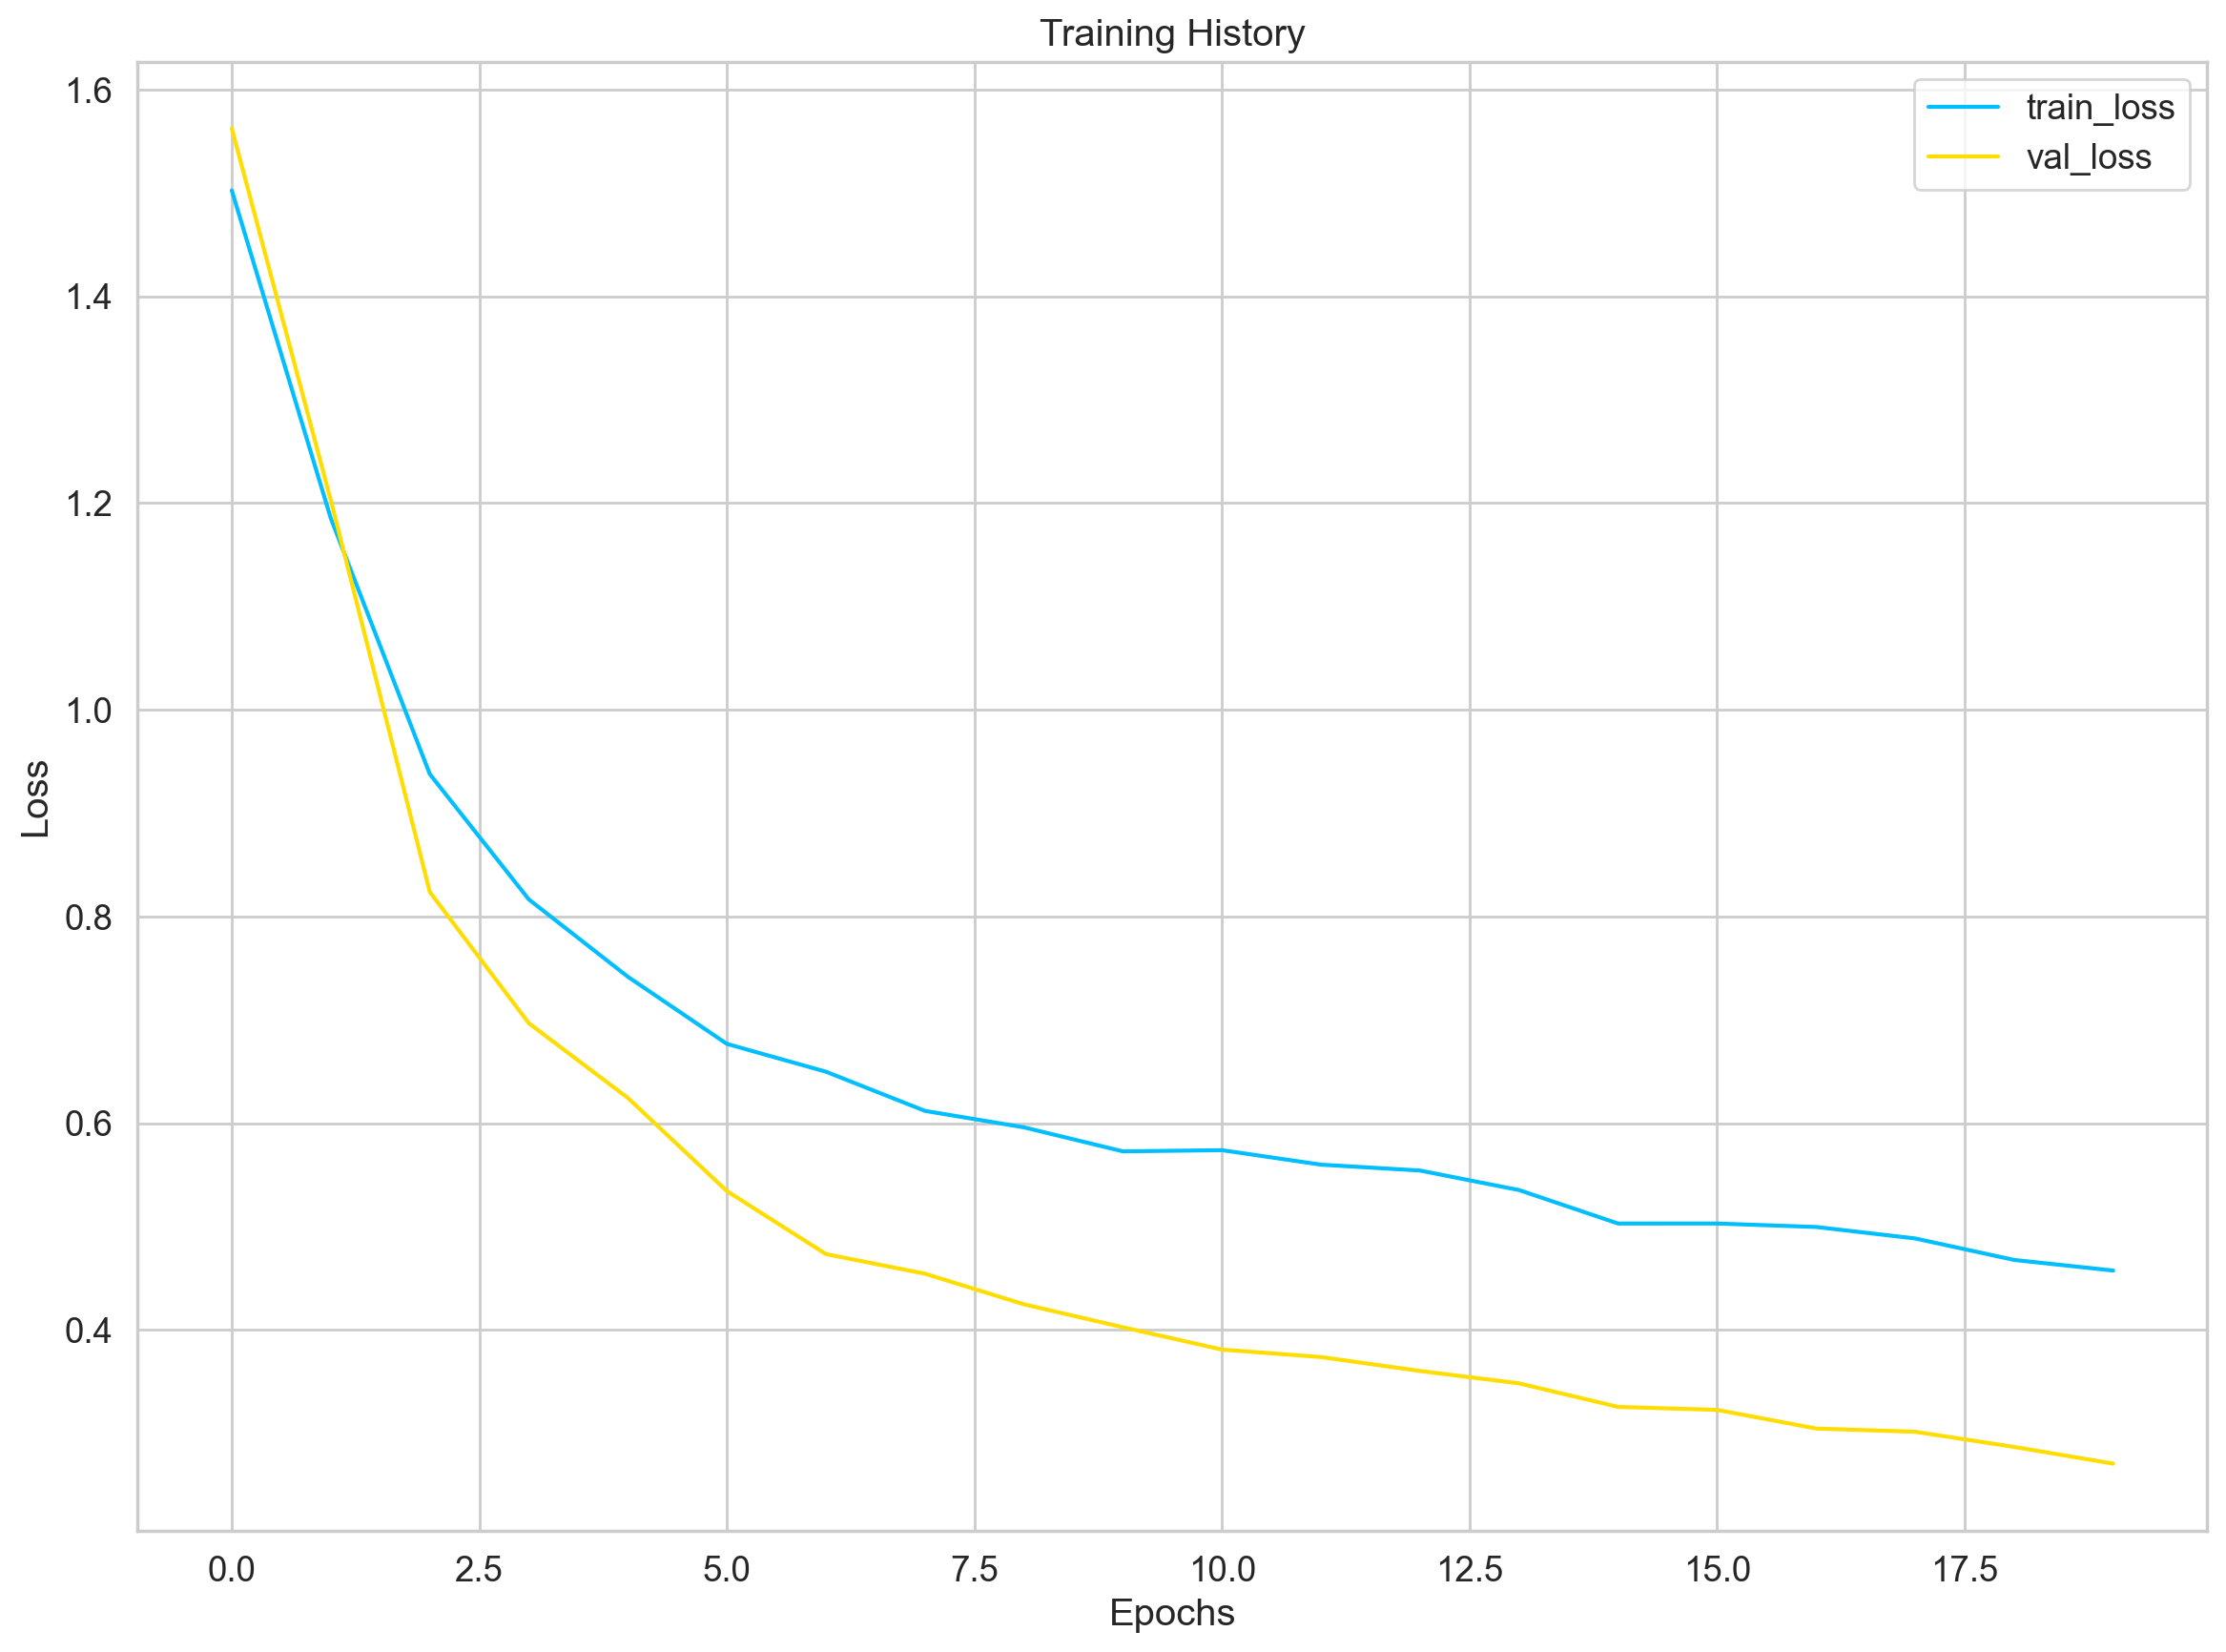

In [117]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=1)

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [118]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = (y_test)  # No need to specify axis

print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, zero_division=1))


45/45 [==============================] - 1s 1ms/step
Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.99      0.84       300
         1.0       1.00      0.99      0.99       311
         2.0       1.00      1.00      1.00       209
         3.0       1.00      1.00      1.00       318
         4.0       0.98      0.63      0.77       296

    accuracy                           0.92      1434
   macro avg       0.94      0.92      0.92      1434
weighted avg       0.94      0.92      0.92      1434



In [56]:
from sklearn.metrics import accuracy_score

# Assuming y_pred_classes and y_test are your predicted and true labels, respectively

# Calculate accuracy for each class
class_accuracies = [accuracy_score(y_test[y_test == label], y_pred_classes[y_test == label]) for label in np.unique(y_test)]

# Print accuracies for each class
for label, accuracy in zip(np.unique(y_test), class_accuracies):
    print(f'Class {label} Accuracy: {accuracy:.4f}')


Class 0.0 Accuracy: 0.8742
Class 1.0 Accuracy: 0.9601
Class 2.0 Accuracy: 1.0000
Class 3.0 Accuracy: 1.0000
Class 4.0 Accuracy: 1.0000


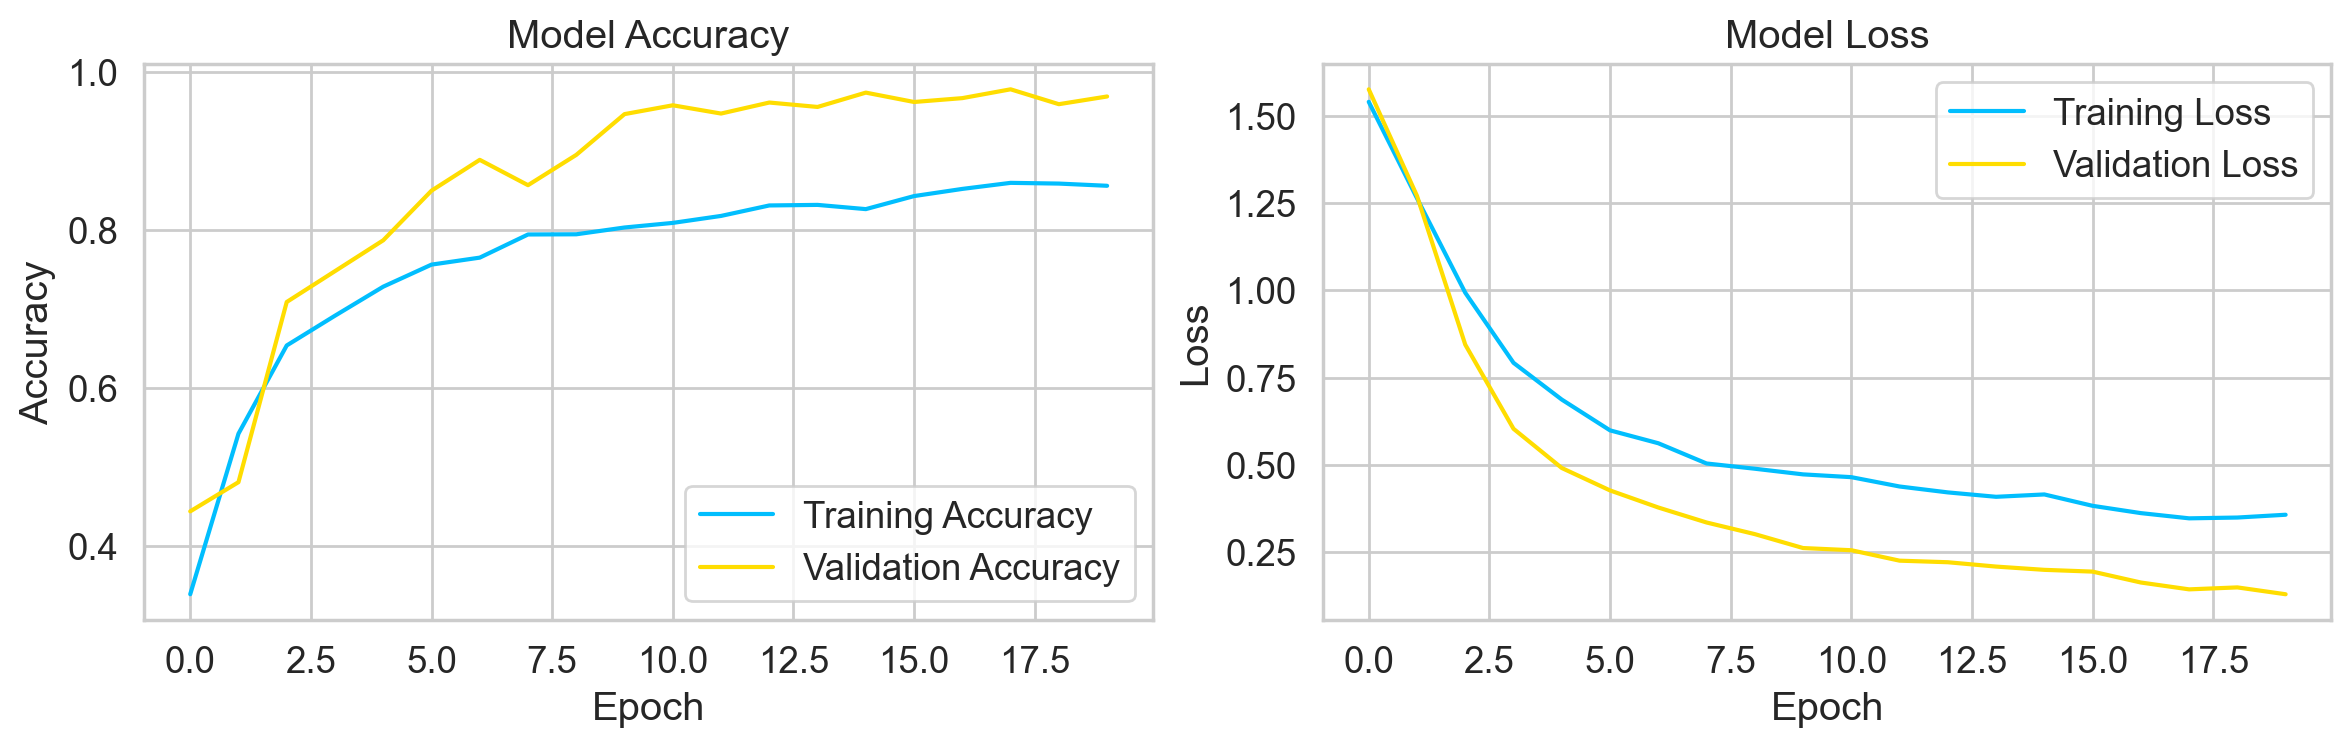

In [57]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

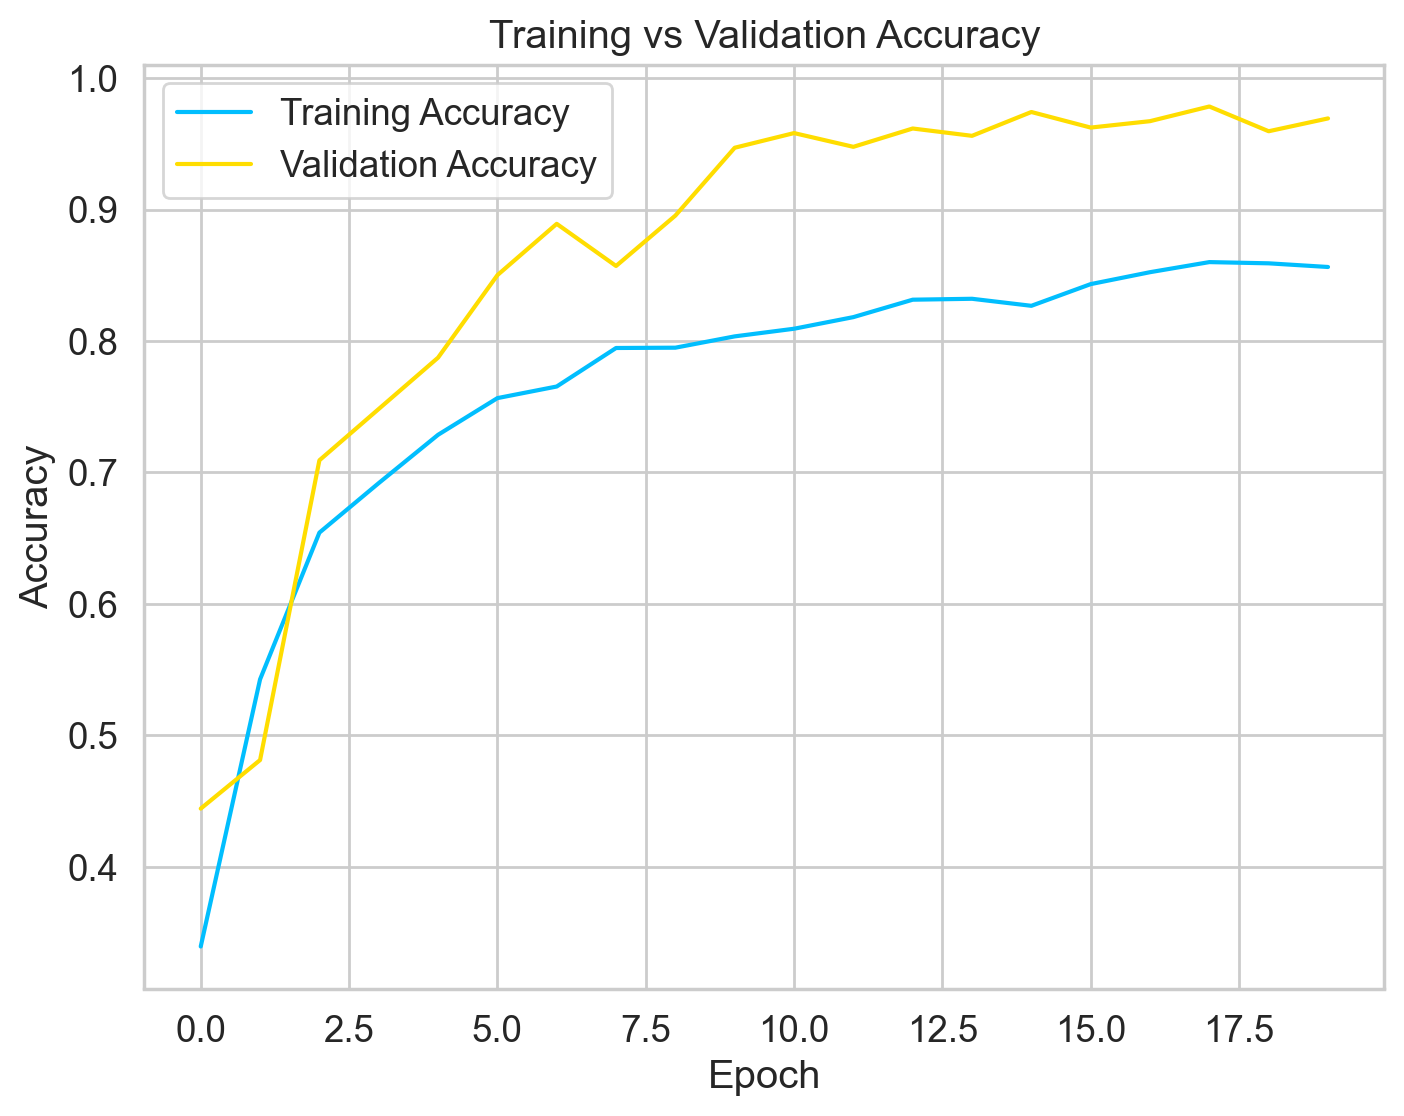

In [58]:
# Plot test vs training accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

45/45 [==============================] - 0s 2ms/step - loss: 0.1340 - accuracy: 0.9637
Test Accuracy: 0.9637377858161926


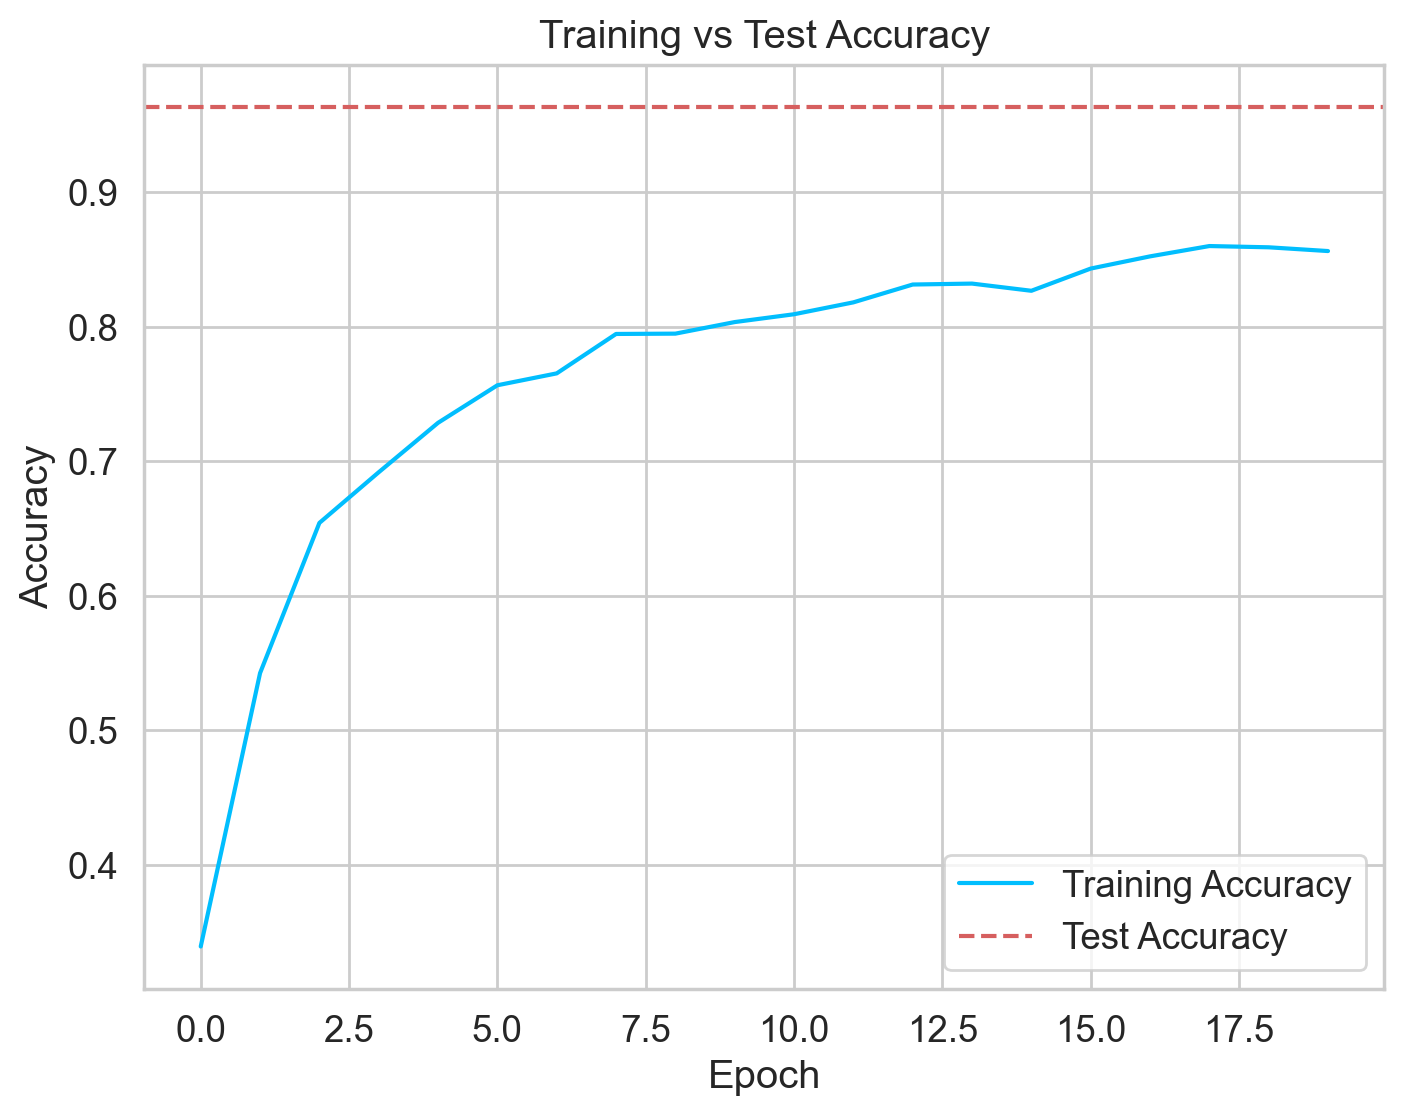

In [59]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Accuracy: {test_accuracy}')

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Training vs Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

45/45 [==============================] - 0s 2ms/step


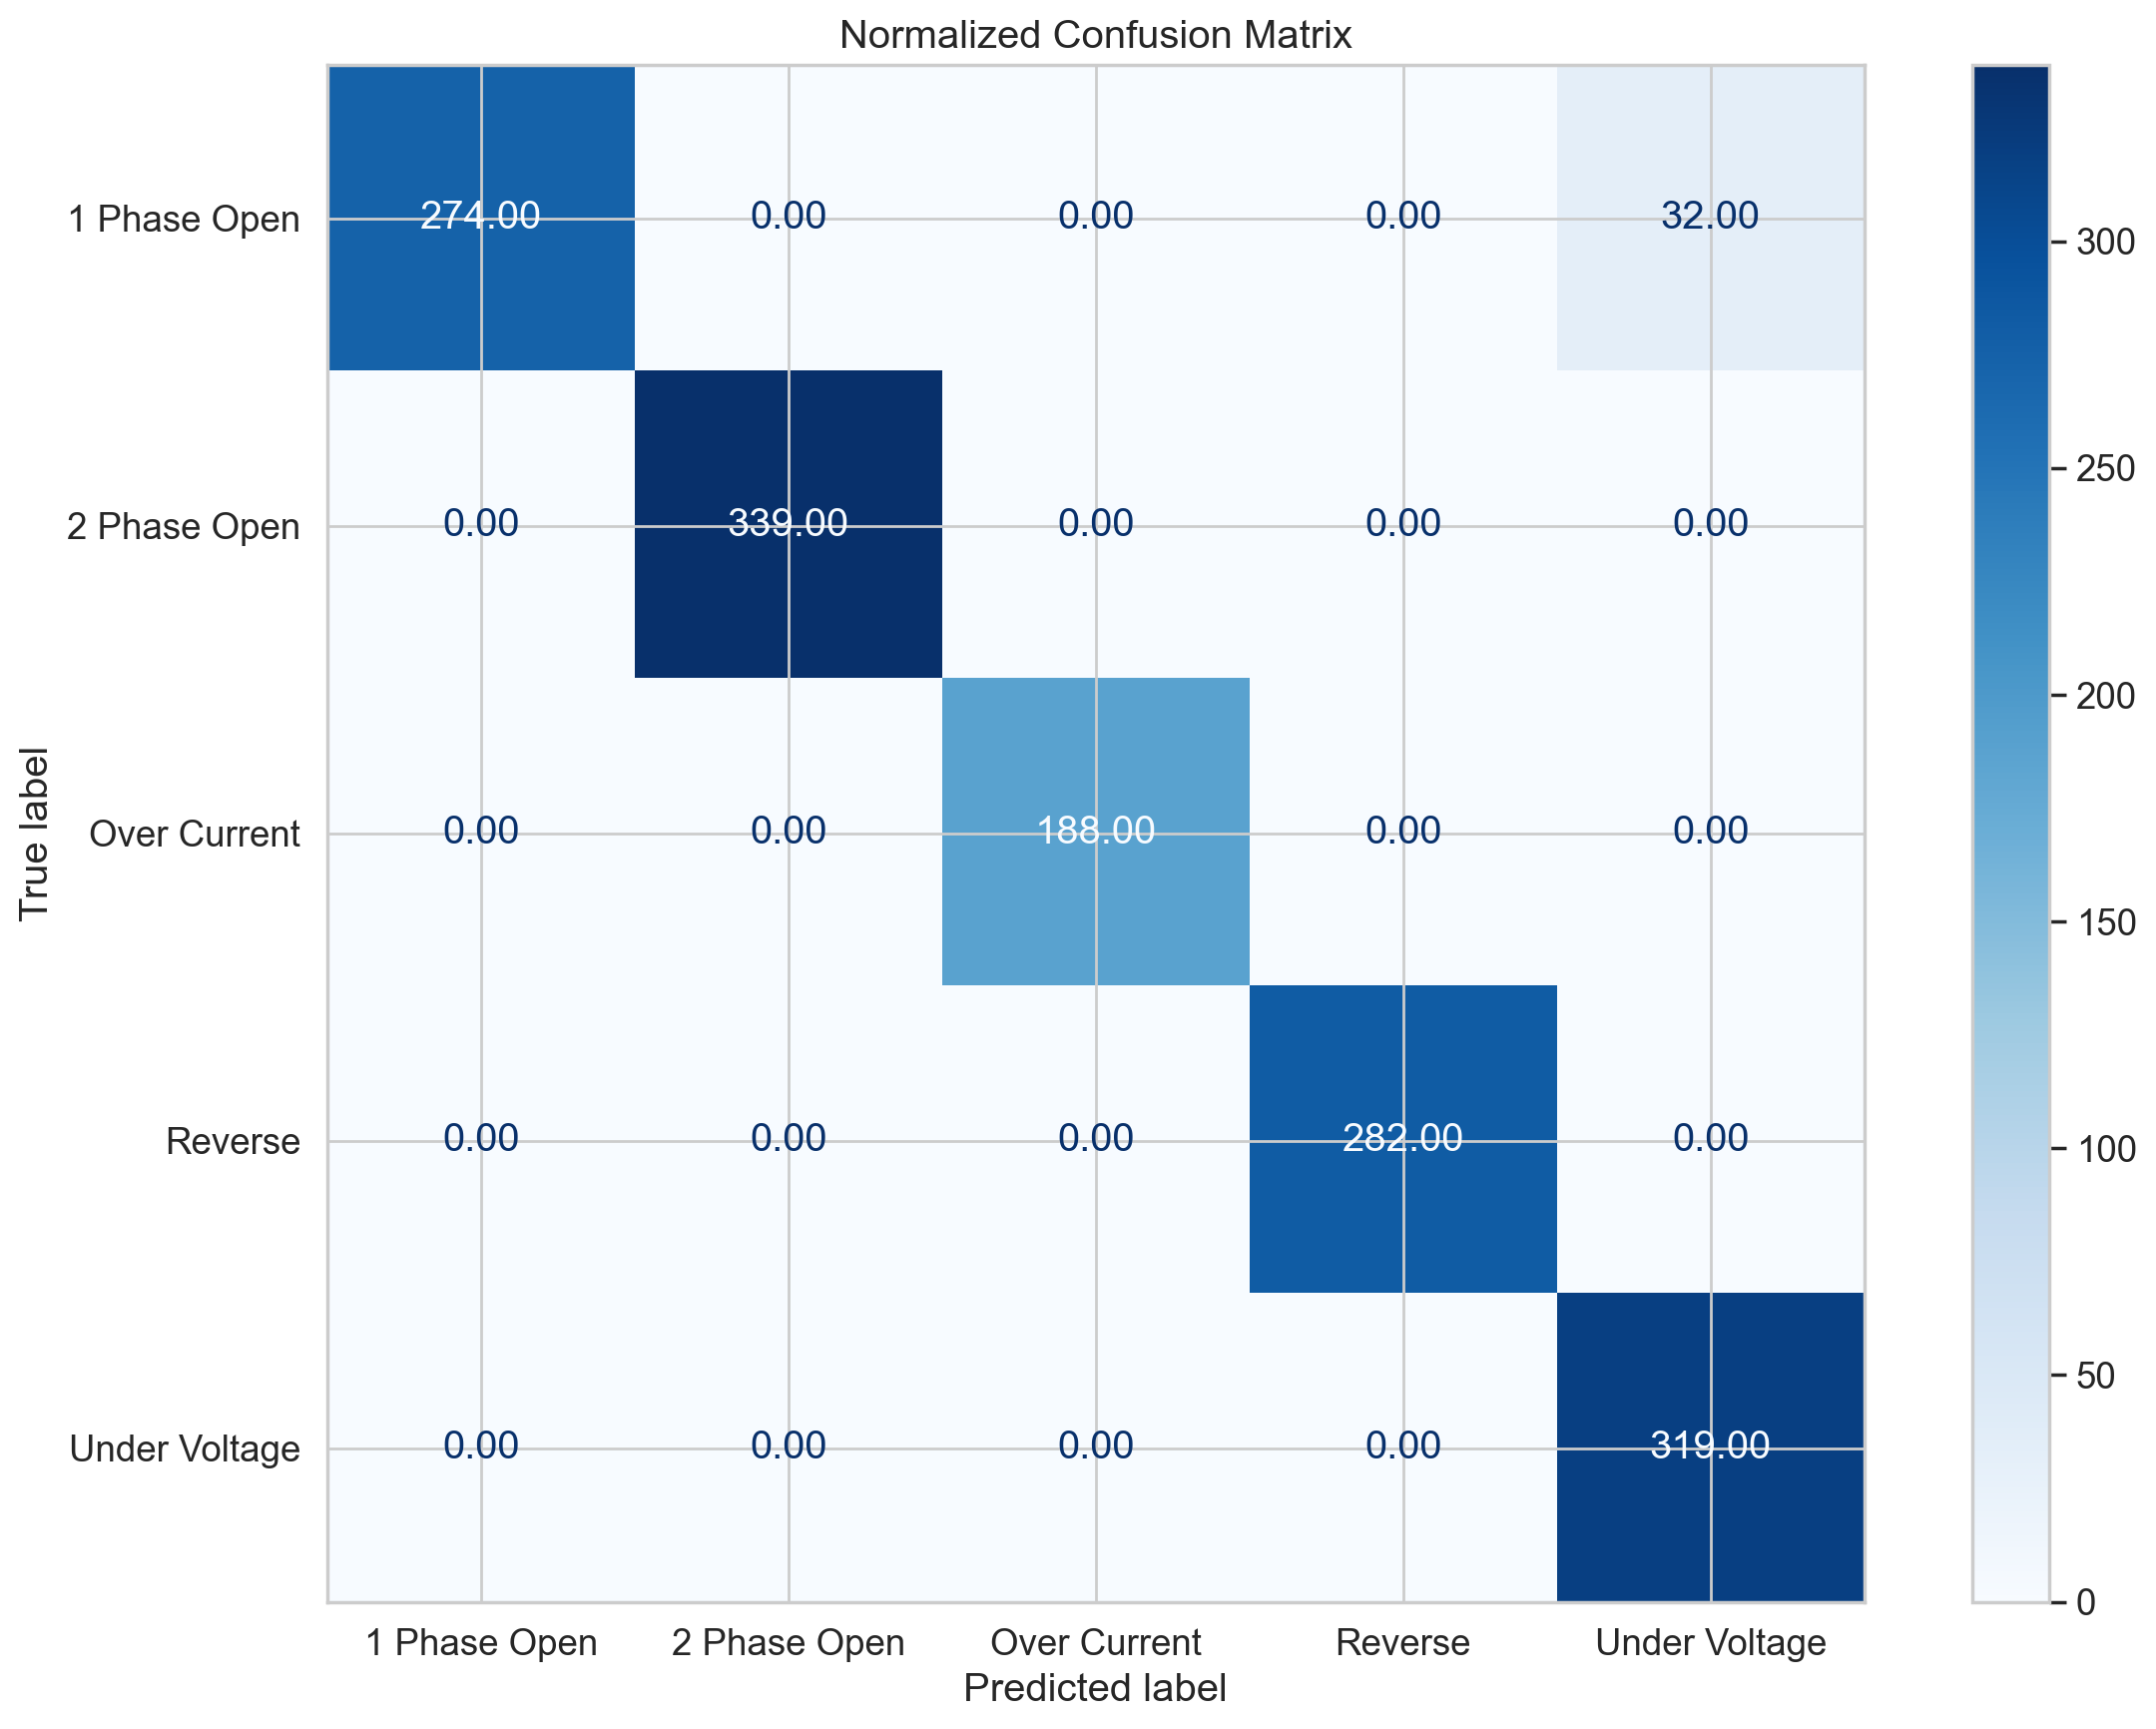

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Create confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='.2f')
plt.title('Normalized Confusion Matrix')
plt.show()

# LSTM Simple

In [40]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense, BatchNormalization, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from sklearn.model_selection import train_test_split

X, y, label_encoder = time_series(df)

# Split the data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=102)

# Split the temporary test set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=102)

# Reshape your input data to have the shape (batch_size, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Print the reshaped shapes
print("X_train shape (reshaped):", X_train.shape)
print("X_test shape (reshaped):", X_test.shape)

# Print the reshaped shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X shape:", X.shape)
print("y shape:", y.shape)
print(X_train.shape)

# Define input layer
inputs = Input(shape=(None, X.shape[1]))

# Build the model using the Functional API
x = LSTM(units=10)(inputs)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

outputs = Dense(units=5, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile your model with the custom optimizer and sparse categorical crossentropy
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


X shape: (7168, 9)
y shape: (7168,)
X_train shape (reshaped): (4300, 1, 9)
X_test shape (reshaped): (1434, 1, 9)
X_train shape: (4300, 1, 9)
X_test shape: (1434, 1, 9)
X shape: (7168, 9)
y shape: (7168,)
(4300, 1, 9)


Epoch 1/20
135/135 [==============================] - 2s 5ms/step - loss: 1.4329 - accuracy: 0.4049 - val_loss: 1.3372 - val_accuracy: 0.6185
Epoch 2/20
135/135 [==============================] - 0s 2ms/step - loss: 0.9744 - accuracy: 0.6016 - val_loss: 0.9858 - val_accuracy: 0.6932
Epoch 3/20
135/135 [==============================] - 0s 2ms/step - loss: 0.8068 - accuracy: 0.6609 - val_loss: 0.7067 - val_accuracy: 0.7622
Epoch 4/20
135/135 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.7021 - val_loss: 0.5695 - val_accuracy: 0.7887
Epoch 5/20
135/135 [==============================] - 0s 2ms/step - loss: 0.6237 - accuracy: 0.7305 - val_loss: 0.4933 - val_accuracy: 0.8333
Epoch 6/20
135/135 [==============================] - 0s 2ms/step - loss: 0.5631 - accuracy: 0.7605 - val_loss: 0.4358 - val_accuracy: 0.8445
Epoch 7/20
135/135 [==============================] - 0s 2ms/step - loss: 0.5144 - accuracy: 0.7865 - val_loss: 0.3819 - val_accuracy: 0.8905
Epoch 

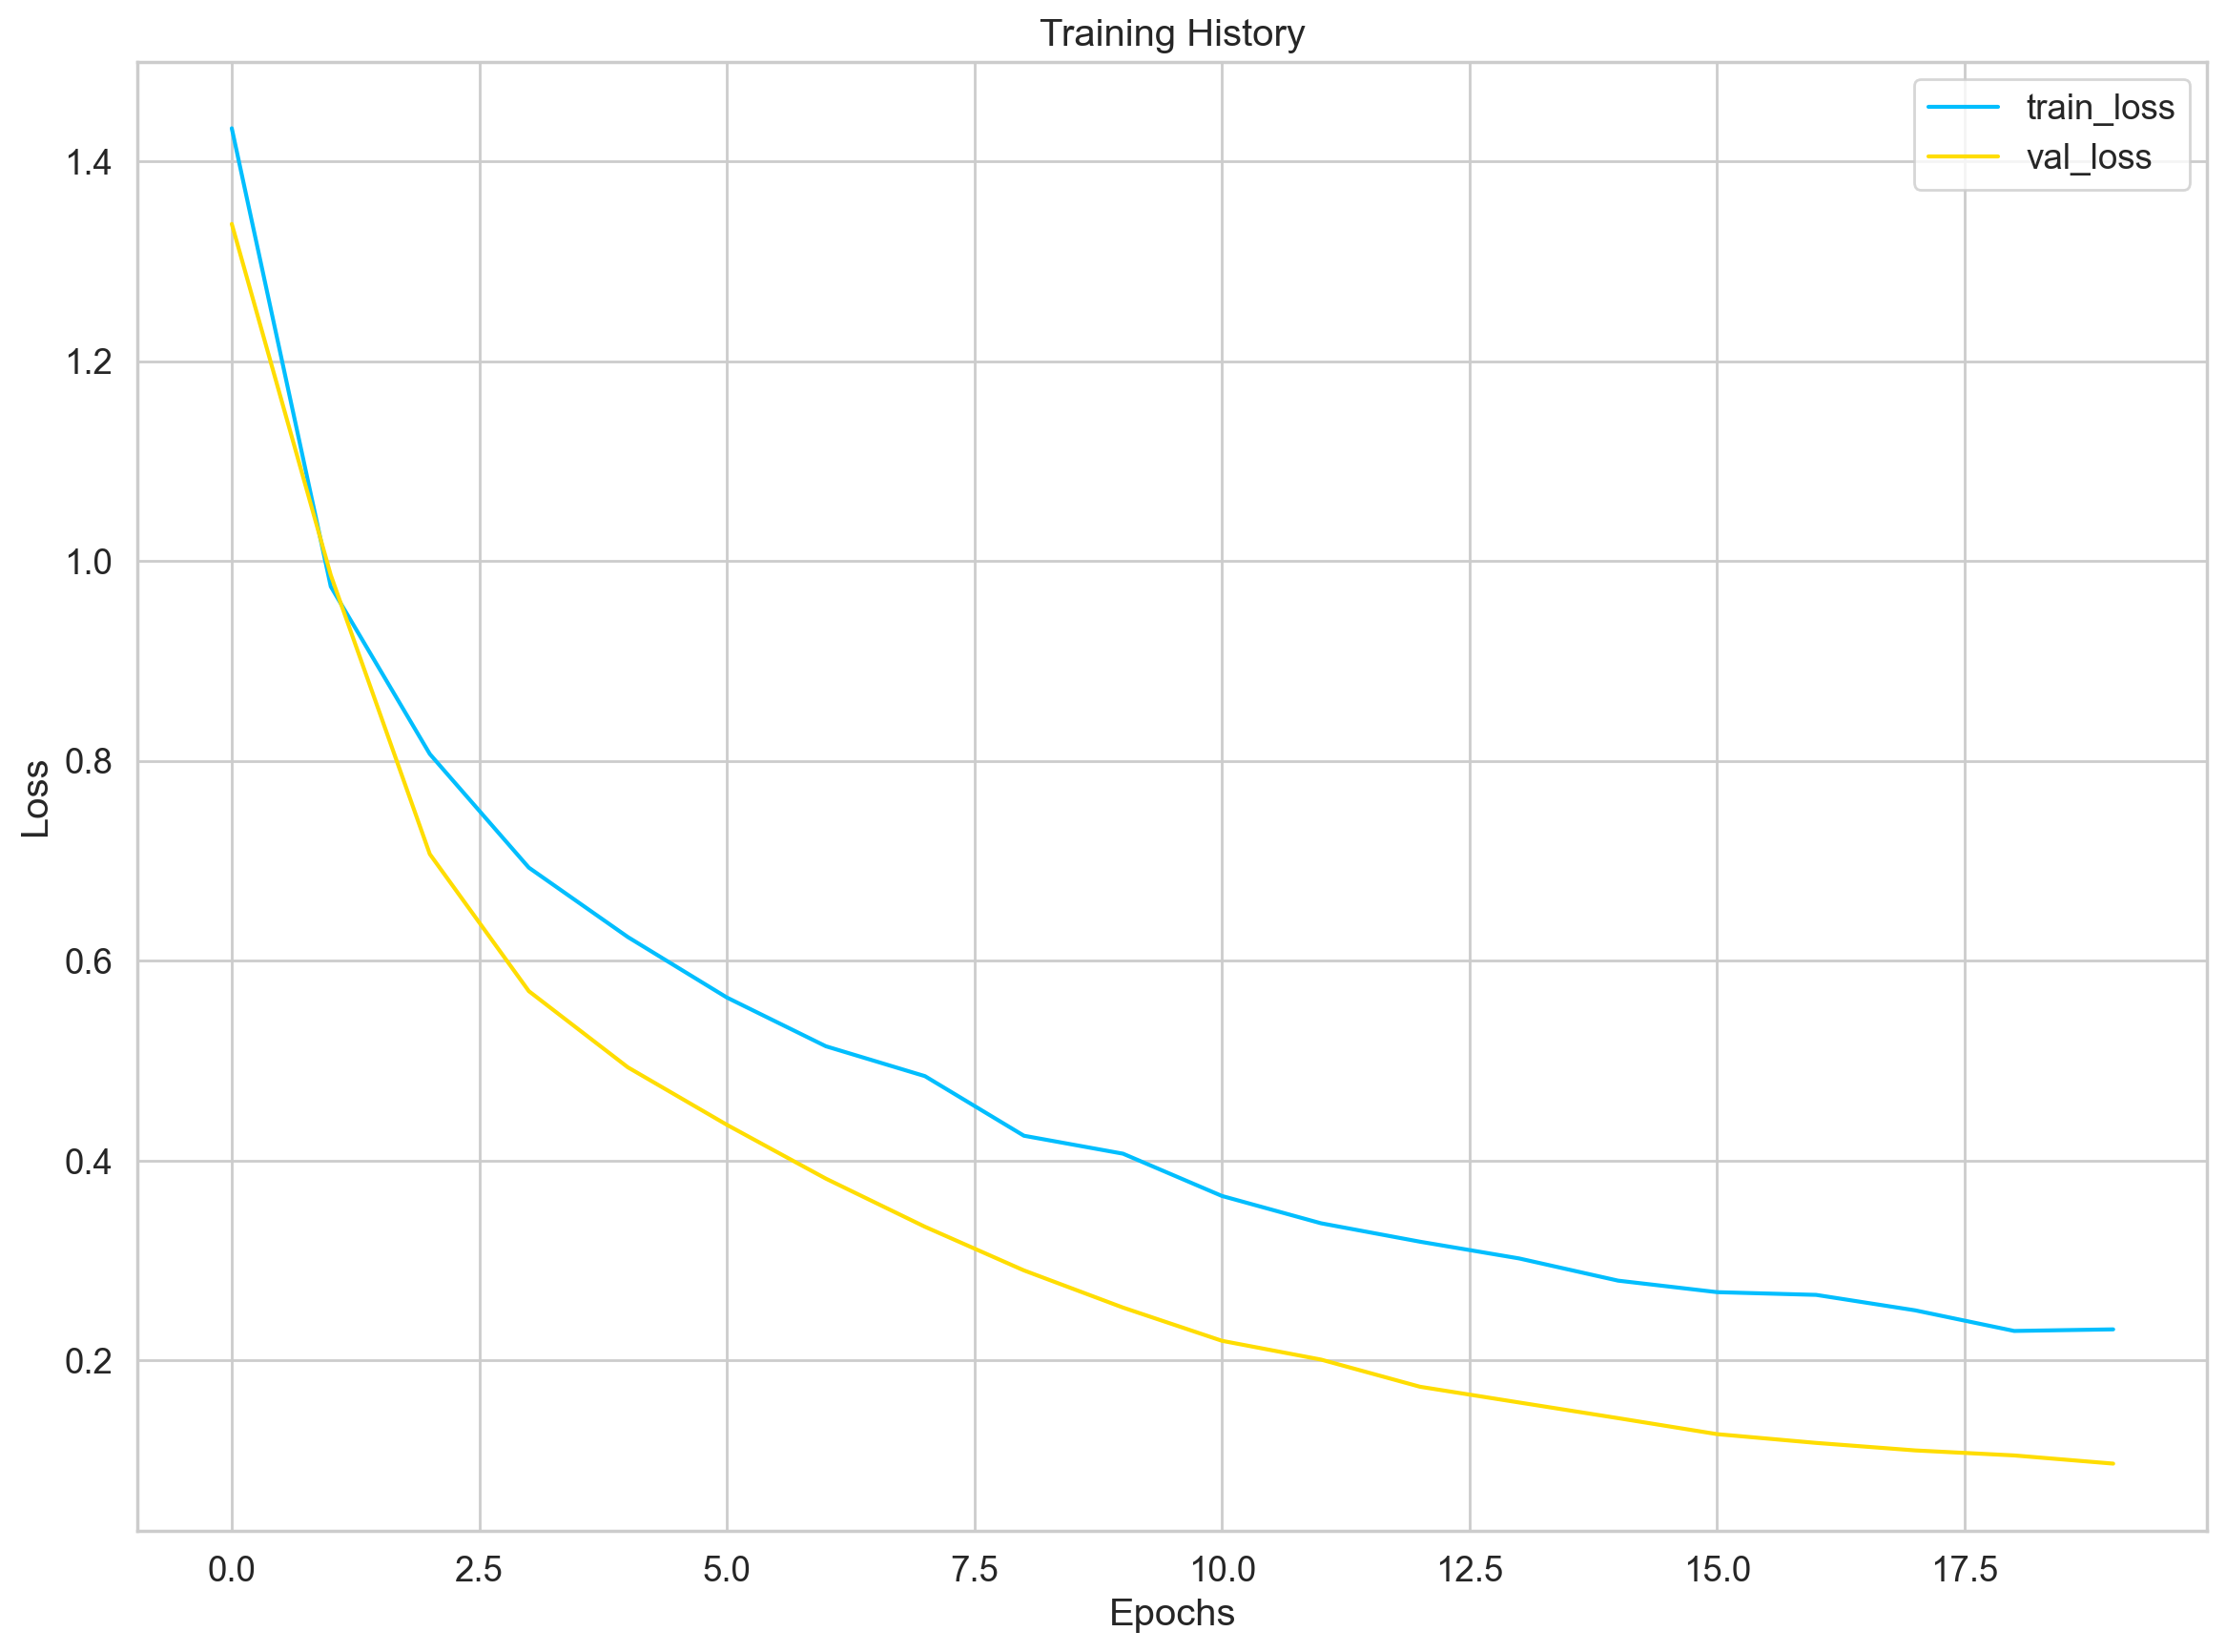

In [41]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=1)

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


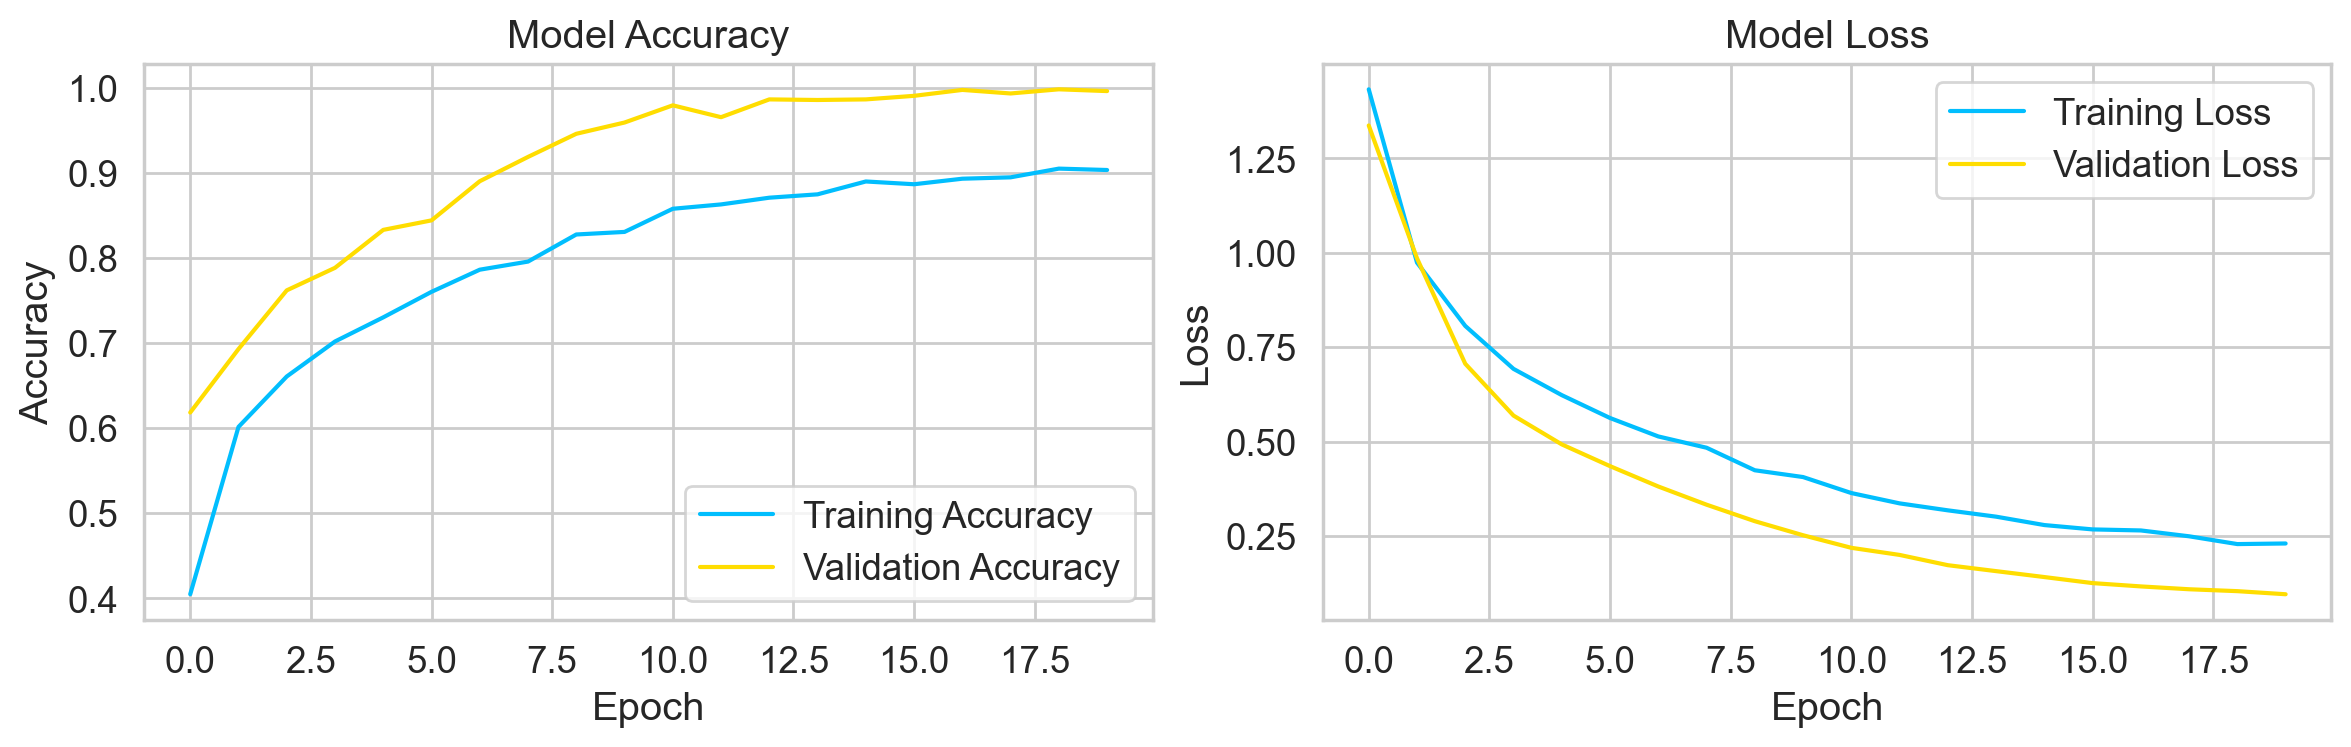

In [42]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [43]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = (y_test)  # No need to specify axis

print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, zero_division=1))


45/45 [==============================] - 0s 850us/step
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       318
         1.0       1.00      1.00      1.00       301
         2.0       1.00      1.00      1.00       199
         3.0       1.00      1.00      1.00       310
         4.0       0.99      0.96      0.98       306

    accuracy                           0.99      1434
   macro avg       0.99      0.99      0.99      1434
weighted avg       0.99      0.99      0.99      1434



45/45 [==============================] - 0s 1ms/step


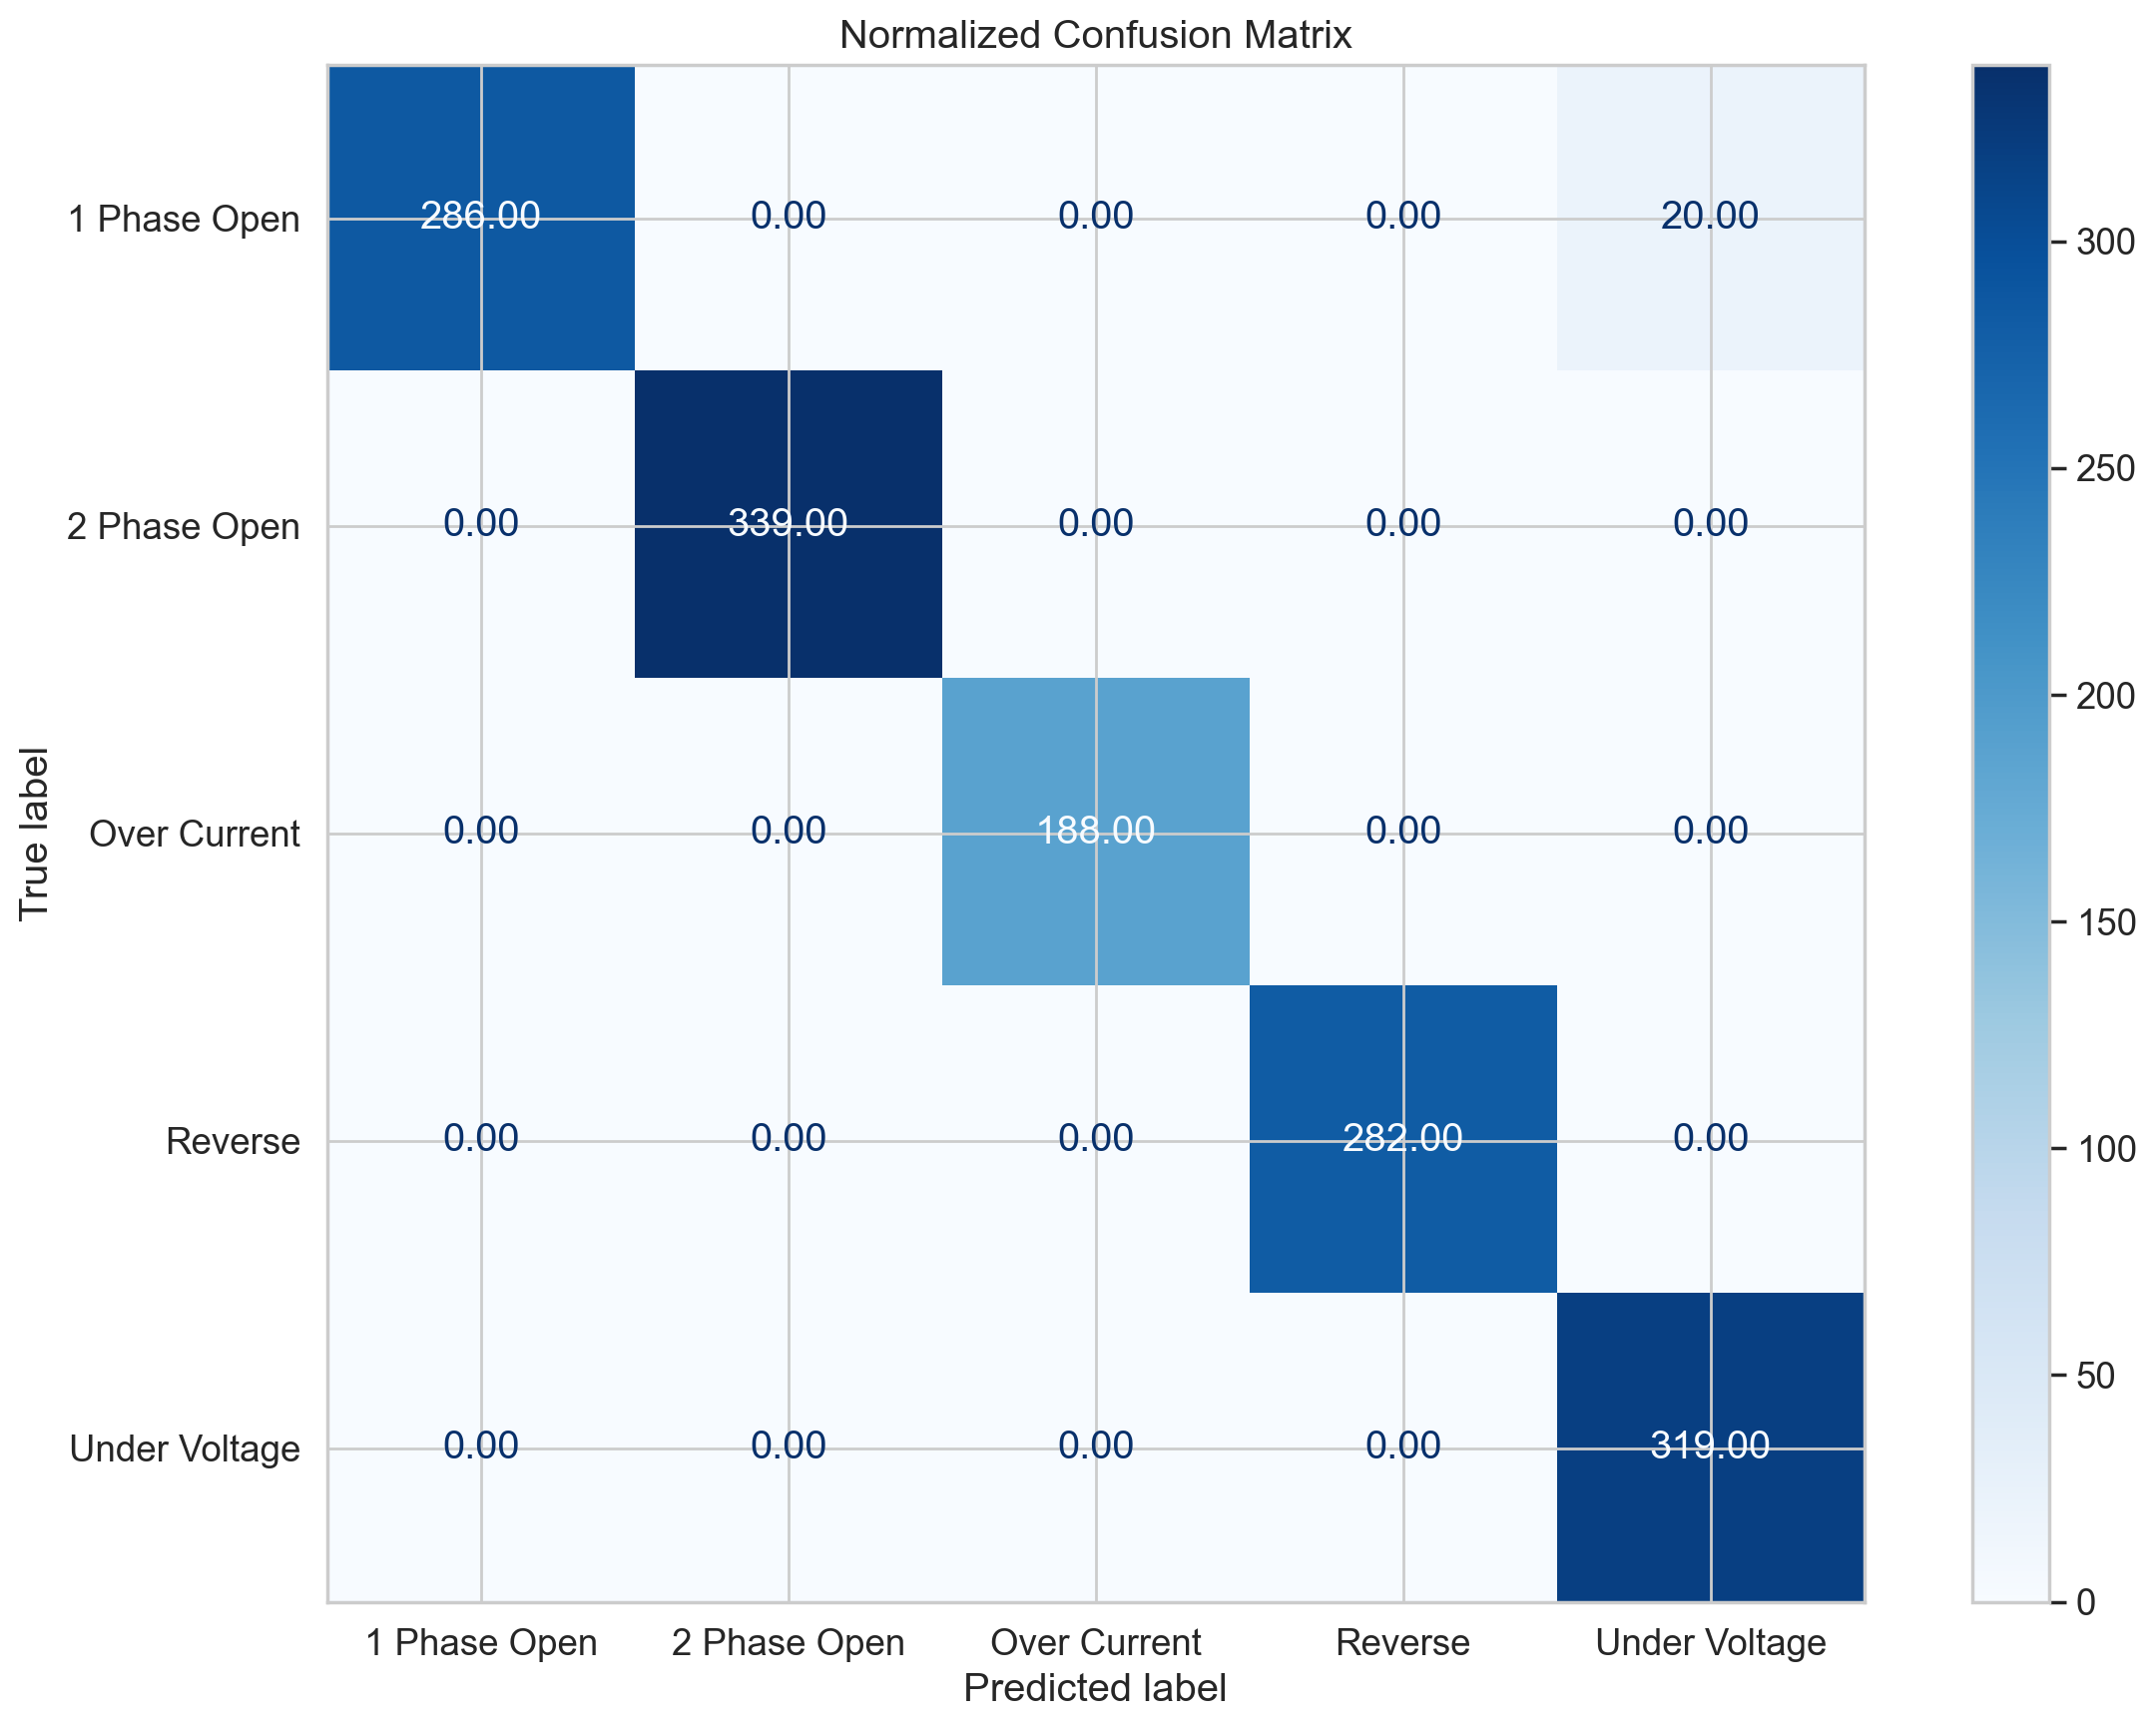

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Create confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='.2f')
plt.title('Normalized Confusion Matrix')
plt.show()

# LSTM with K-Fold

Average Training Accuracy: 0.9630
Average Validation Accuracy: 0.9602


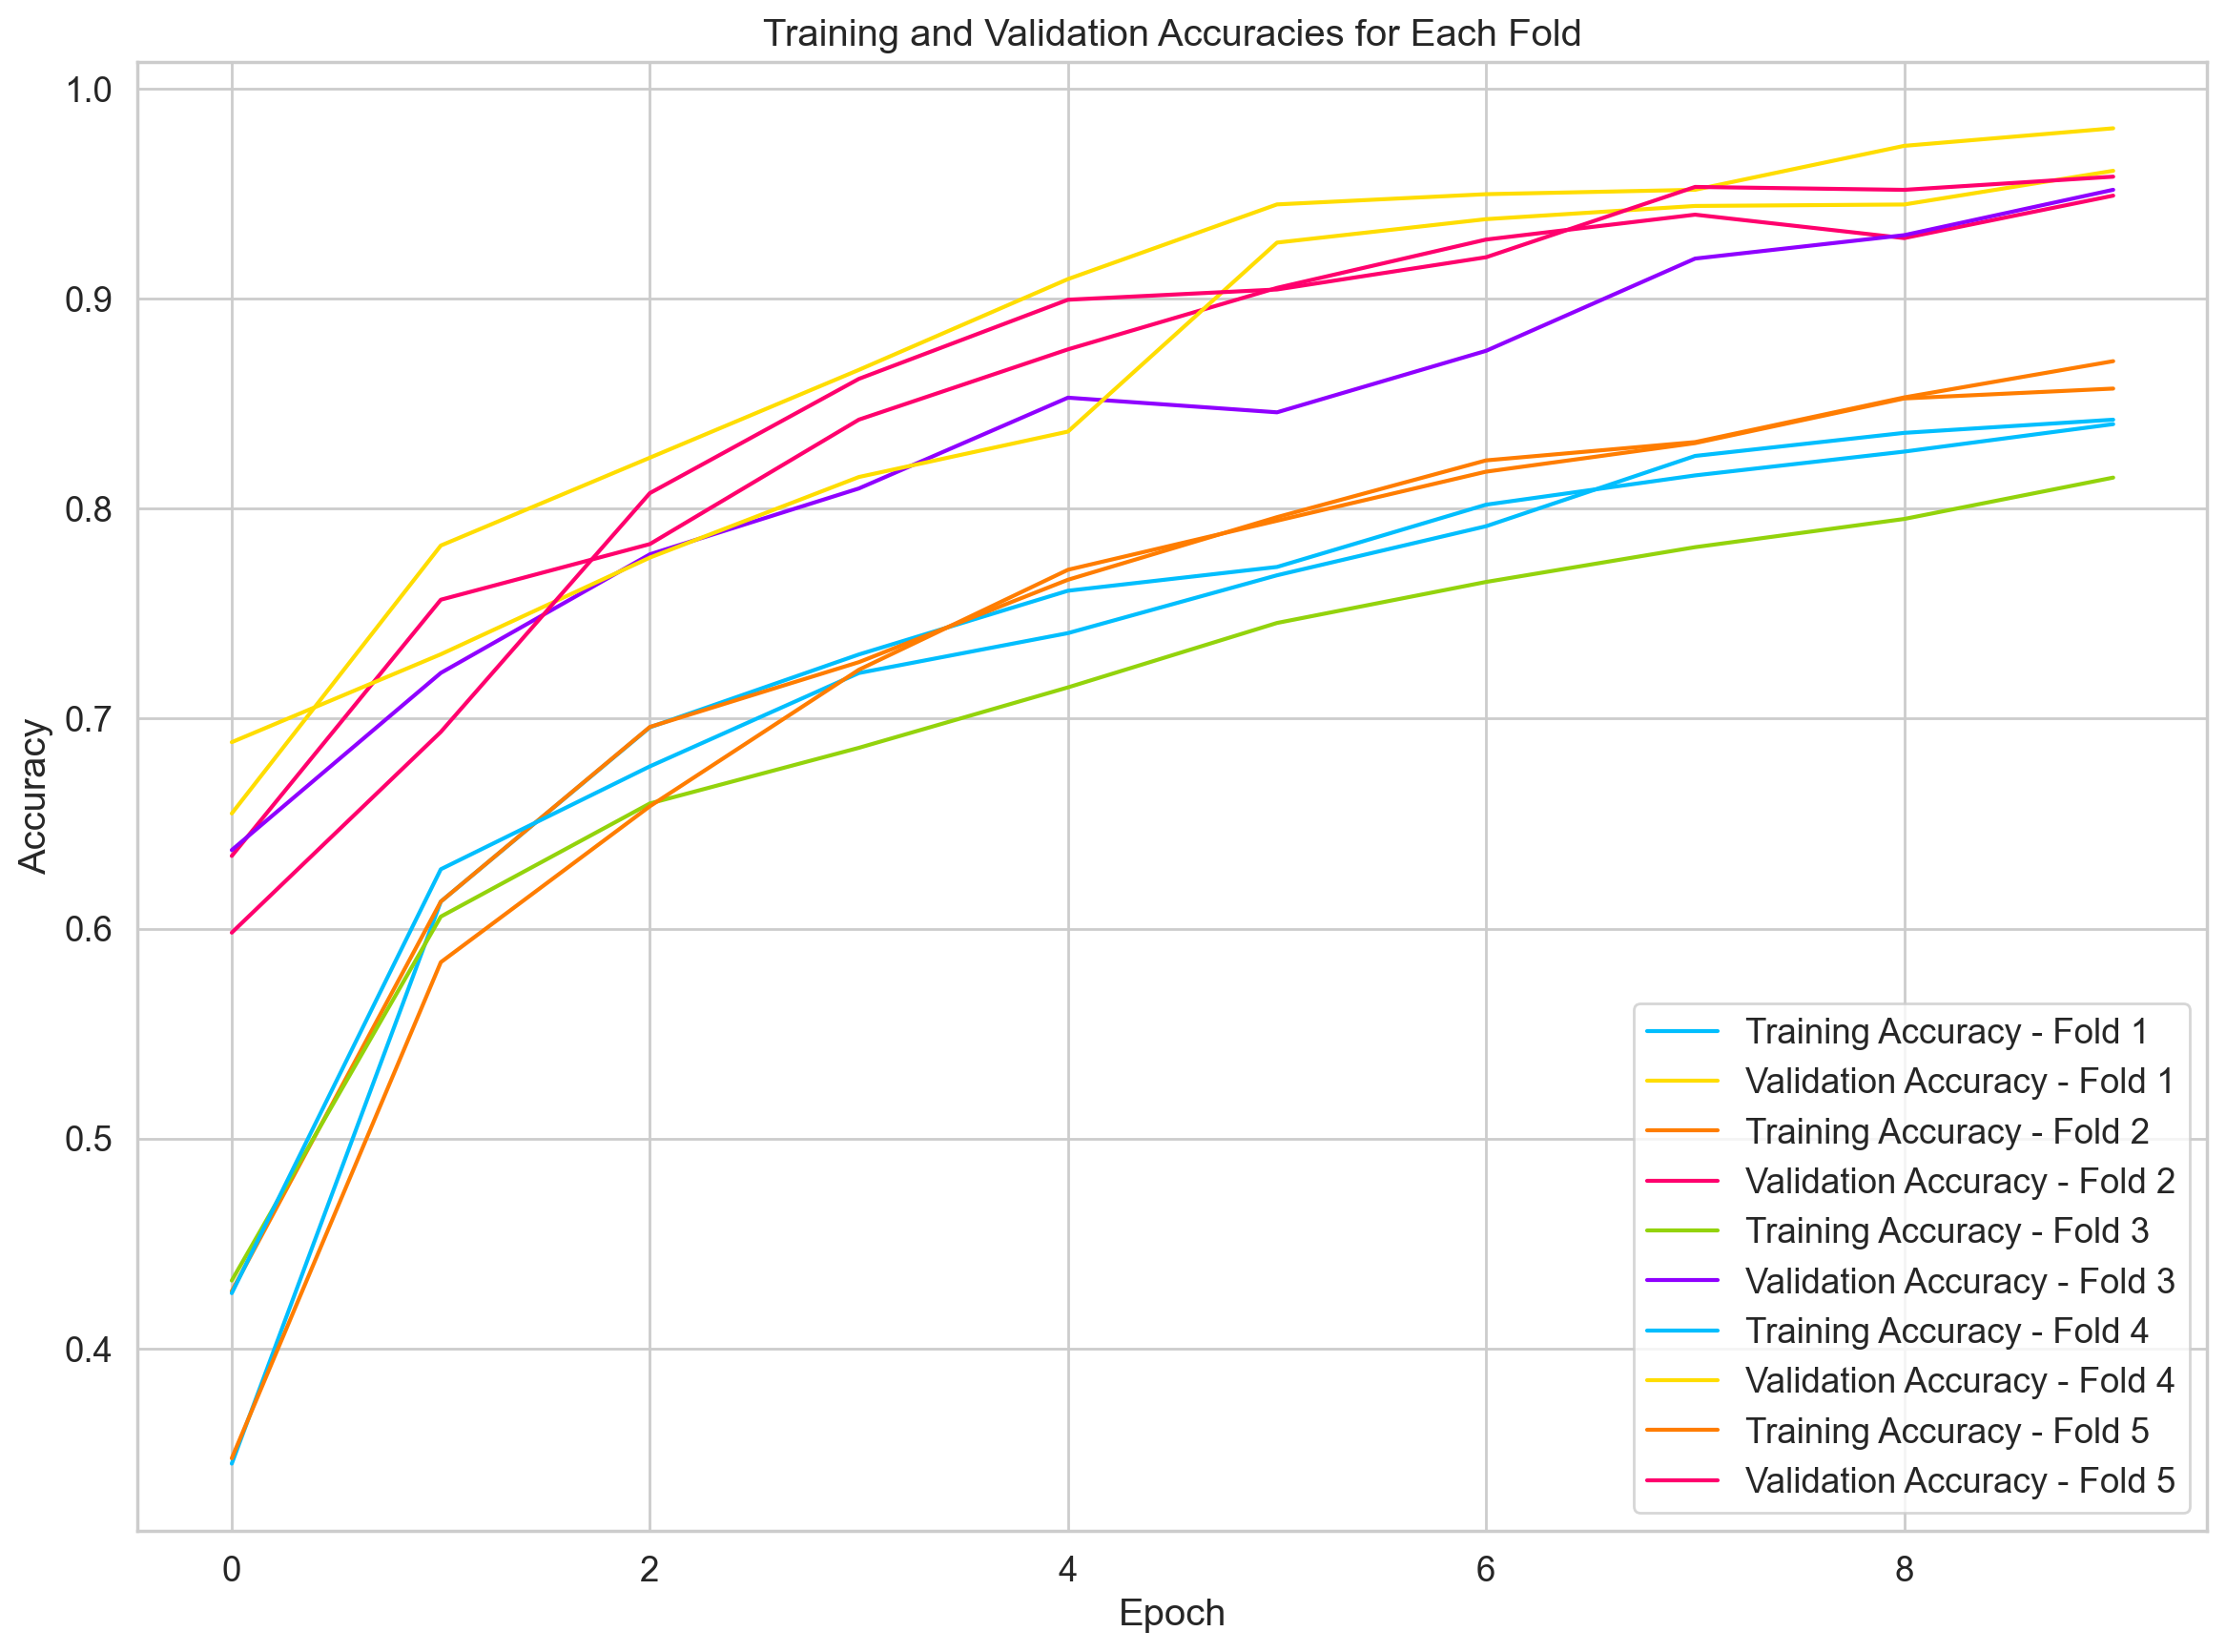

In [37]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Assuming X, y, label_encoder are your data and label_encoder object

# Define the number of folds
k_folds = 5

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=102)

# Lists to store accuracy values
train_accuracies = []
val_accuracies = []

# Iterate over each fold
for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
    # Split the data into training and validation sets
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    # Reshape input data
    X_train_fold = X_train_fold.reshape((X_train_fold.shape[0], 1, X_train_fold.shape[1]))
    X_val_fold = X_val_fold.reshape((X_val_fold.shape[0], 1, X_val_fold.shape[1]))

    # Define input layer
    inputs = Input(shape=(None, X.shape[1]))

    # Build the model using the Functional API
    x = LSTM(units=10)(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    outputs = Dense(units=5, activation='softmax')(x)

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)

    # Compile the model
    model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(X_val_fold, y_val_fold), verbose=0)

    # Evaluate on training and validation data
    train_accuracy = model.evaluate(X_train_fold, y_train_fold, verbose=0)[1]
    val_accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)[1]

    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    # Plot training and validation accuracies for each fold
    plt.plot(history.history['accuracy'], label=f'Training Accuracy - Fold {fold}')
    plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy - Fold {fold}')

# Print the average accuracies
print(f"Average Training Accuracy: {np.mean(train_accuracies):.4f}")
print(f"Average Validation Accuracy: {np.mean(val_accuracies):.4f}")

# Add labels and legend to the plot
plt.title('Training and Validation Accuracies for Each Fold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Time series with steps

In [94]:
df

Time     E1     I1     E2     I2     E3     I3     AI8     Pm Torque  \
0      0.000  19.1 -0.904  458.3  0.032 -439.5  0.979 -1257.0  266.6     -2   
1      0.098  36.1 -0.898  466.1 -0.011 -429.5  0.987 -1255.7  266.0     -2   
2      0.195  53.5 -0.877  477.0 -0.048 -427.3  1.010 -1251.9  264.9     -2   
3      0.293  70.9 -0.837  483.0 -0.055 -412.0  1.019 -1254.5  266.5     -2   
4      0.391  86.1 -0.816  493.5 -0.076 -406.3  1.034 -1259.6  267.2     -2   
...      ...   ...    ...    ...    ...    ...    ...     ...    ...    ...   
7163  49.512  42.2  1.895 -346.1 -0.403  386.7 -1.589   376.9   76.3      2   
7164  49.609  30.5  1.876 -355.7 -0.356  379.7 -1.644   274.7   57.9      2   
7165  49.707  14.4  1.849 -361.3 -0.293  374.0 -1.686   399.8   84.4      2   
7166  49.805  -1.3  1.790 -364.8 -0.234  365.3 -1.742   399.8   84.4      2   
7167  49.902 -15.2  1.769 -372.6 -0.183  357.4 -1.797   397.3   83.7      2   

           Category  
0           Reverse  
1           Reverse  
2           Reverse  
3           Reverse  
4           Reverse  
...             ...  
7163  Under Voltage  
7164  Under Voltage  
7165  Under Voltage  
7166  Under Voltage  
7167  Under Voltage  

[7168 rows x 11 columns]

In [98]:
def time_series_steps(df):
    X, y, label_encoder = time_series(df)
    print(X)

    # Assuming X and y are your original features and labels
    X_seq = []
    y_seq = []

    # Assuming seq_length is the desired length of each sequence
    seq_length = 10  # You can adjust this value based on your problem

    for i in range(len(X) - seq_length + 1):
        X_seq.append(X[i:i + seq_length, :])
        y_seq.append(y[i + seq_length - 1])  # Fix the indexing here

    X_seq = np.array(X_seq)
    y_seq = np.array(y_seq)

    # Print the shapes
    print("X sequence shape:", X_seq.shape)
    print("y sequence shape:", y_seq.shape)
    return X_seq, y_seq


In [99]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense, BatchNormalization, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from sklearn.model_selection import train_test_split

X, y= time_series_steps(df)

# Split the data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=102)

# Split the temporary test set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=102)

# Assuming seq_length is the desired length of each sequence
seq_length = 10

# Reshape your input data to have the shape (batch_size, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], seq_length, X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], seq_length, X_test.shape[2]))
X_val = X_val.reshape((X_val.shape[0], seq_length, X_val.shape[2]))

# Convert labels to integers (if not already)
y_train = y_train.astype(int)
y_val = y_val.astype(int)
y_test = y_test.astype(int)


# Print the reshaped shapes
print("X_train shape (reshaped):", X_train.shape)
print("X_test shape (reshaped):", X_test.shape)

# Print the reshaped shapes
print("X shape:", X.shape)
print("y shape:", y.shape)
print(X_train.shape)

# Define input layer
inputs = Input(shape=(seq_length, X_train.shape[2]))

# Build the model using the Functional API
x = LSTM(units=10)(inputs)
x = BatchNormalization()(x)
outputs = Dense(units=5, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Set your custom learning rate parameters
initial_learning_rate = 0.001
decay_steps = 10000
decay_rate = 0.9
clip_value = 1.0  # Adjust as needed



# Create the optimizer with gradient clipping using clipvalue
optimizer = Adam(
    learning_rate=0.001,
    clipvalue=clip_value
)

# Compile your model with the custom optimizer and sparse categorical crossentropy
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


X shape: (7168, 8)
y shape: (7159,)
[[-0.13098947  1.17224043 -1.29438222 ...  1.02960987  1.43601518
  -1.74399107]
 [-0.08406521  1.19358163 -1.26714987 ...  1.03876923  1.42951097
  -1.74282631]
 [-0.03603683  1.22340458 -1.26115875 ...  1.06510238  1.41758656
  -1.73942165]
 ...
 [-0.14396266 -1.07022674  0.92096948 ... -2.02160077 -0.5390993
  -0.25955691]
 [-0.1872986  -1.07980291  0.89727734 ... -2.08571627 -0.5390993
  -0.25955691]
 [-0.22566609 -1.10114411  0.87576378 ... -2.14868684 -0.54668756
  -0.26179682]]
X sequence shape: (7159, 10, 8)
y sequence shape: (7159,)
X_train shape (reshaped): (4295, 10, 8)
X_test shape (reshaped): (1432, 10, 8)
X shape: (7159, 10, 8)
y shape: (7159,)
(4295, 10, 8)


In [100]:
model.summary()

Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 10, 8)]           0         
                                                                 
 lstm_34 (LSTM)              (None, 10)                760       
                                                                 
 batch_normalization_27 (Bat  (None, 10)               40        
 chNormalization)                                                
                                                                 
 dense_20 (Dense)            (None, 5)                 55        
                                                                 
Total params: 855
Trainable params: 835
Non-trainable params: 20
_________________________________________________________________


X_train shape: (4295, 10, 8)
X_test shape: (1432, 10, 8)
X_val shape: (1432, 10, 8)
Epoch 1/20
135/135 [==============================] - 3s 7ms/step - loss: 1.1139 - accuracy: 0.5586 - val_loss: 1.0029 - val_accuracy: 0.7570
Epoch 2/20
135/135 [==============================] - 1s 4ms/step - loss: 0.6126 - accuracy: 0.8114 - val_loss: 0.5473 - val_accuracy: 0.9064
Epoch 3/20
135/135 [==============================] - 1s 4ms/step - loss: 0.4020 - accuracy: 0.8969 - val_loss: 0.3090 - val_accuracy: 0.9316
Epoch 4/20
135/135 [==============================] - 0s 4ms/step - loss: 0.2642 - accuracy: 0.9315 - val_loss: 0.1920 - val_accuracy: 0.9546
Epoch 5/20
135/135 [==============================] - 0s 3ms/step - loss: 0.1840 - accuracy: 0.9513 - val_loss: 0.1305 - val_accuracy: 0.9630
Epoch 6/20
135/135 [==============================] - 0s 4ms/step - loss: 0.1265 - accuracy: 0.9707 - val_loss: 0.0818 - val_accuracy: 0.9895
Epoch 7/20
135/135 [==============================] - 0s 3ms/ste

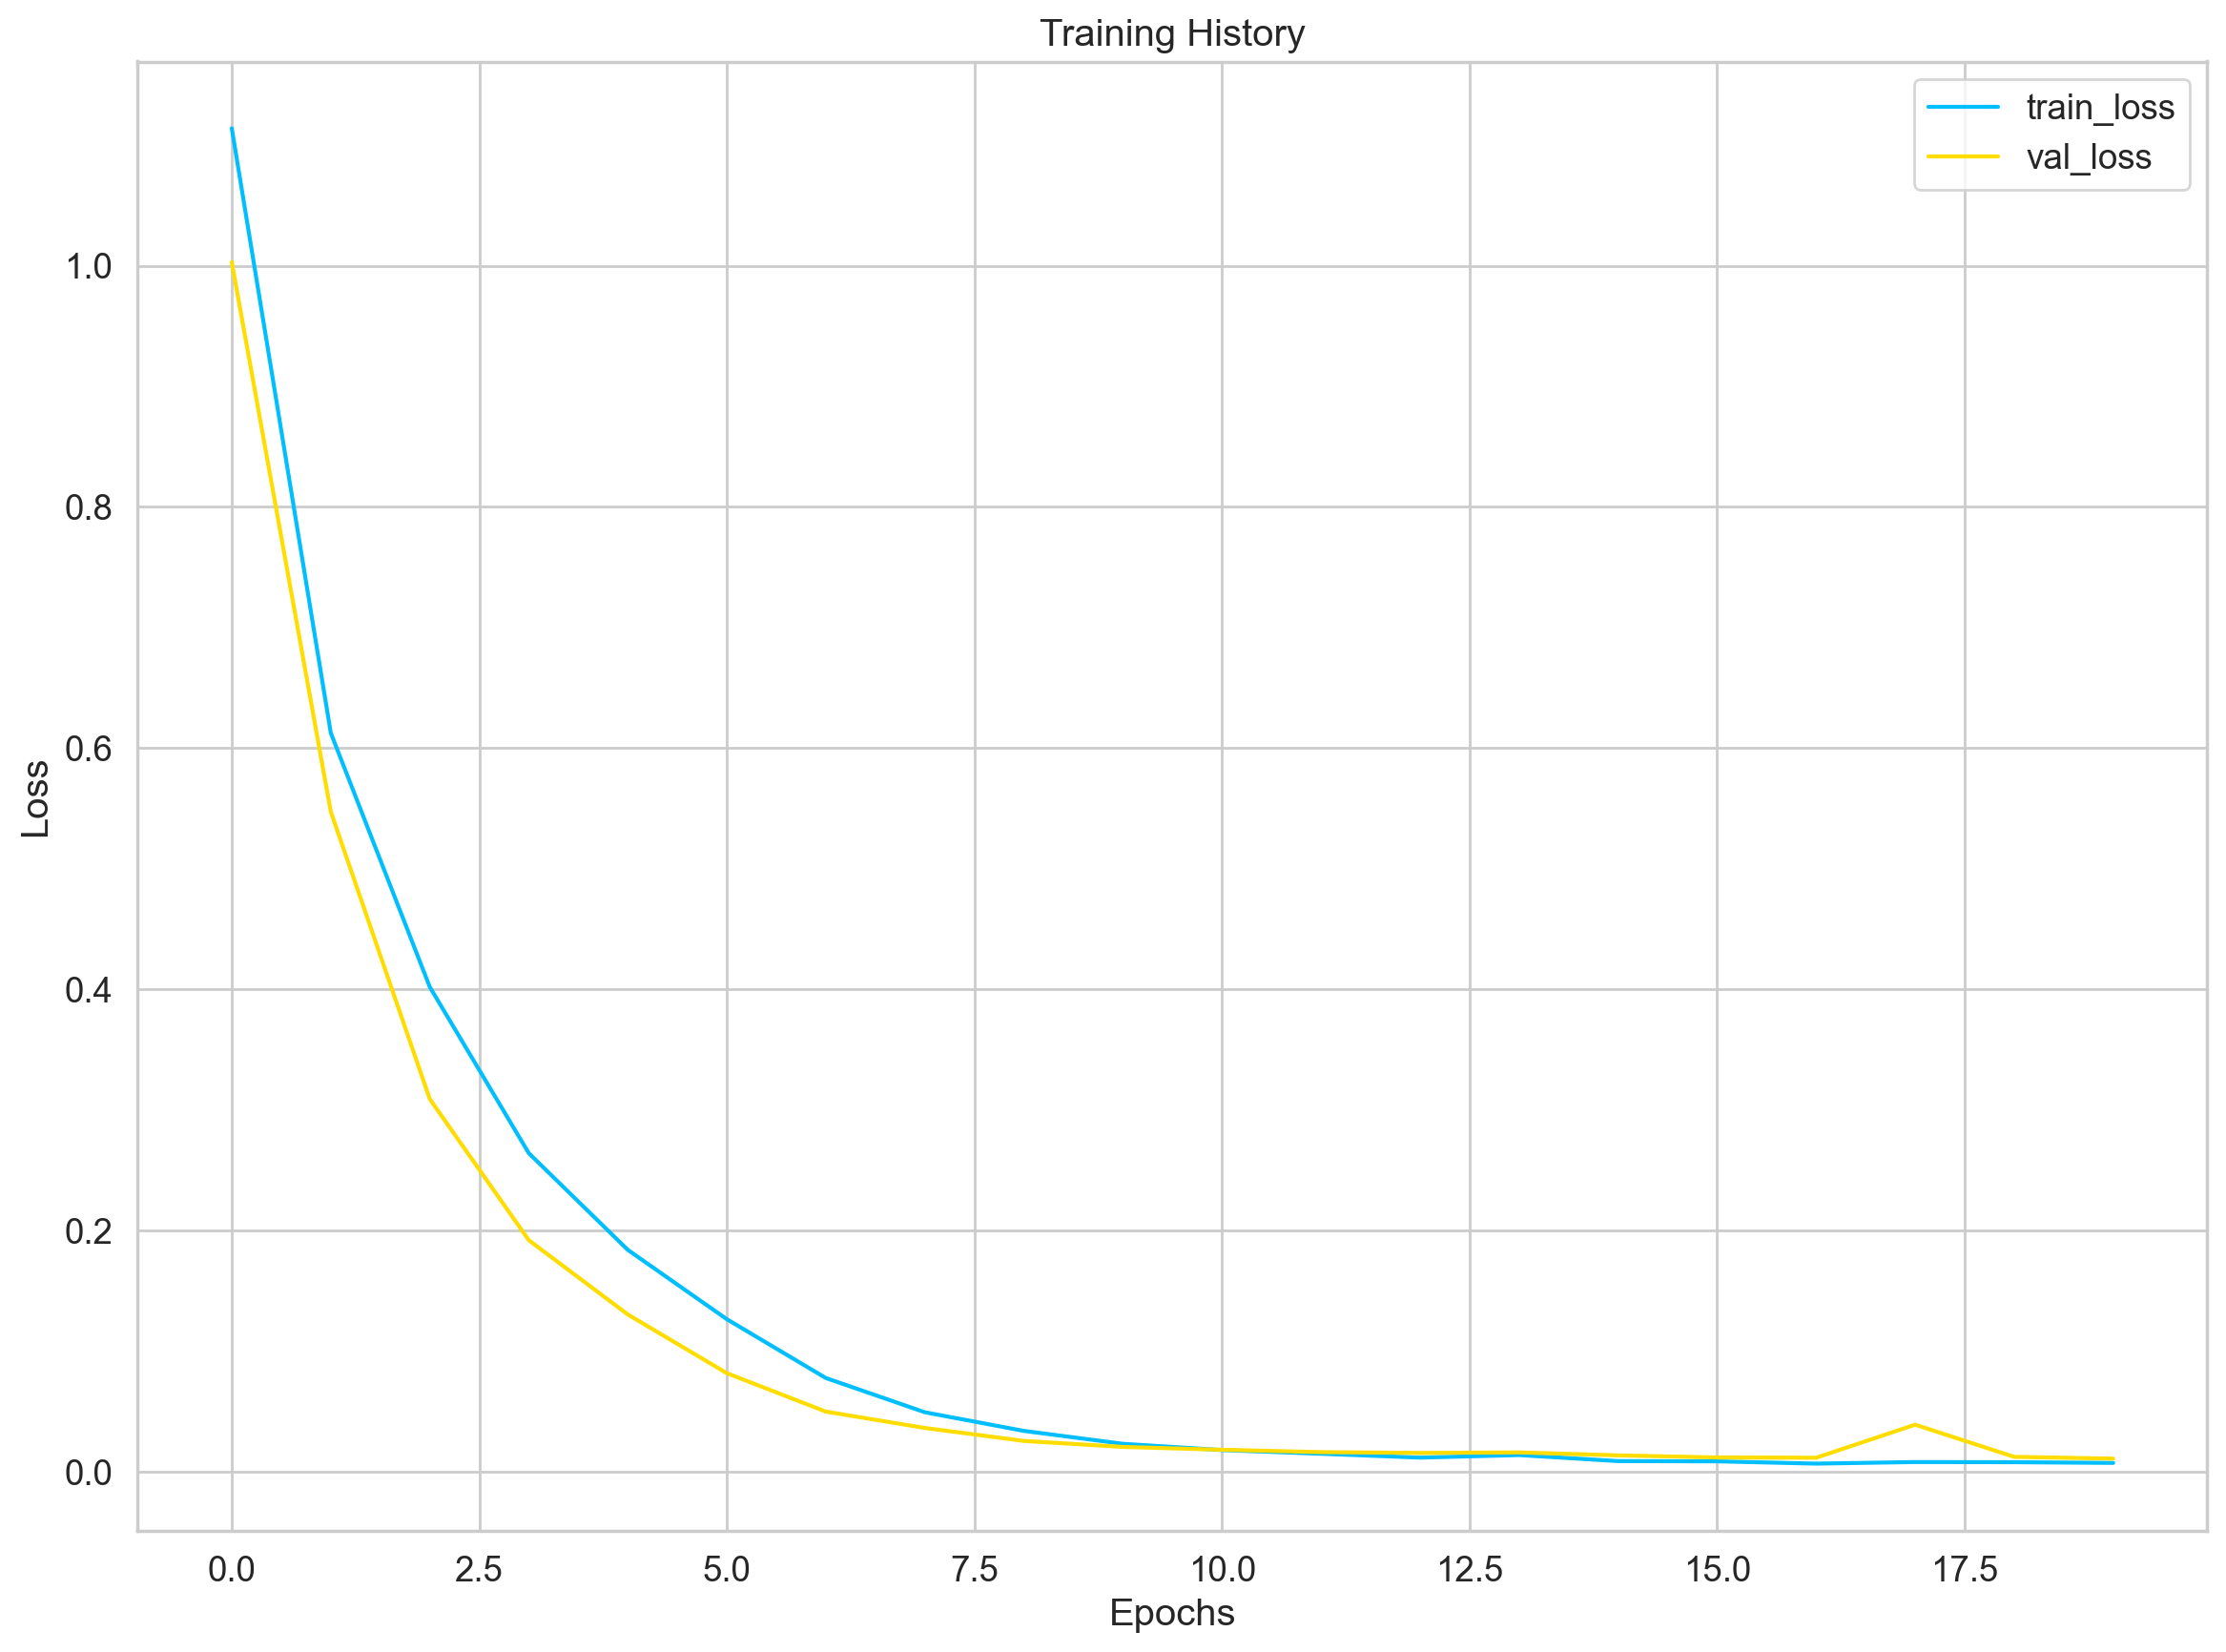

In [101]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_val shape:", X_val.shape)
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=1)

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


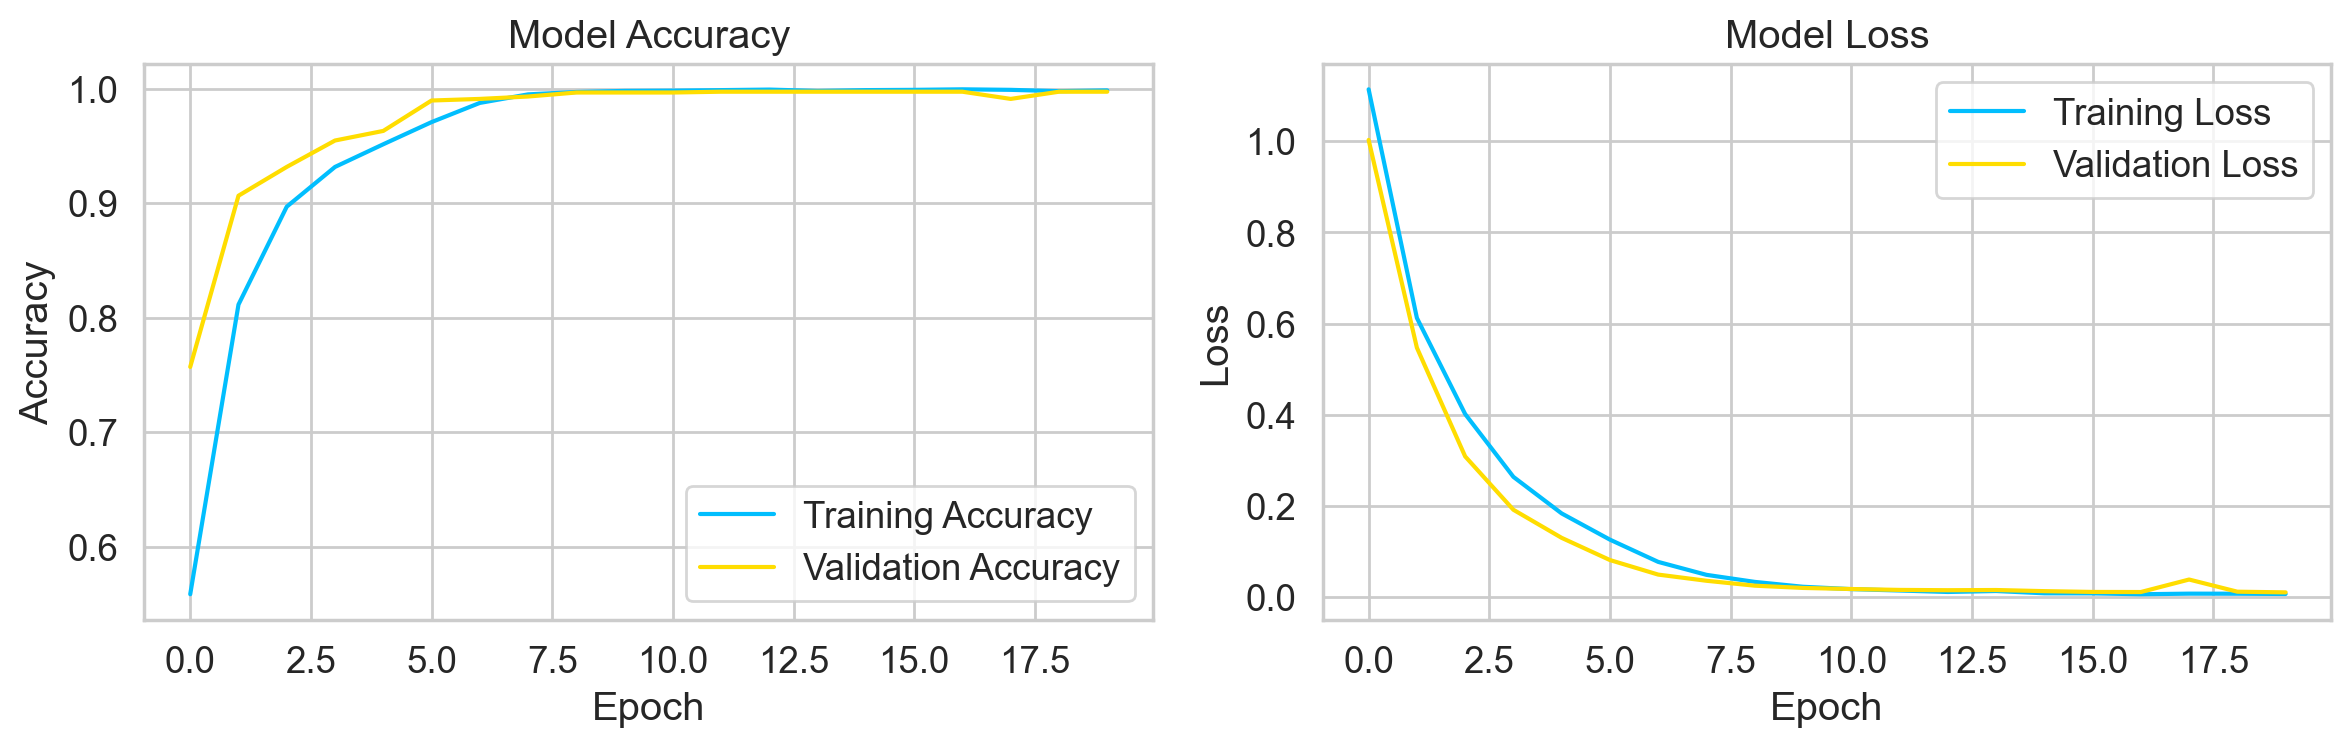

In [102]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [103]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = (y_test)  # No need to specify axis

print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, zero_division=1))


45/45 [==============================] - 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       318
           1       1.00      0.99      1.00       306
           2       1.00      1.00      1.00       195
           3       1.00      1.00      1.00       311
           4       1.00      1.00      1.00       302

    accuracy                           1.00      1432
   macro avg       1.00      1.00      1.00      1432
weighted avg       1.00      1.00      1.00      1432



# LSTM With Noise

In [ ]:

# Assuming you have created and trained your Sequential model
# model = ...

# Get the layers of the model
layers = model.layers

# Choose the index of the hidden layer you're interested in
hidden_layer_index = 1  # Adjust this based on your model architecture

# Access the weights of the hidden layer
hidden_layer_weights = layers[hidden_layer_index].get_weights()

# Print the shape of the weights
for i, weight_array in enumerate(hidden_layer_weights):
    print(f"Shape of weight array {i}: {weight_array.shape}")


In [ ]:
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

X, y, label_encoder = time_series(df)

y = tf.keras.utils.to_categorical(y)

# Add noise to the features
noise_factor = 0.1  # You can adjust this based on the level of noise you want
X_noisy = X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X.shape)

X_train, X_test, y_train, y_test = train_test_split(X_noisy,y, test_size=0.2, random_state=42)

X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define input layer
inputs = Input(shape=(None, X.shape[1]))

# Build the model using the Functional API
x = LSTM(units=30, return_sequences=True)(inputs)  # Add return_sequences=True for the second LSTM layer
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = LSTM(units=30, return_sequences=True)(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = LSTM(units=30)(x)# Add another LSTM layer
outputs = Dense(units=3, activation='softmax')(x)

# Create the model
model_noisy = Model(inputs=inputs, outputs=outputs)

# Set your custom learning rate parameters
initial_learning_rate = 0.001
decay_steps = 10000
decay_rate = 0.9
clip_value = 1.0  # Adjust as needed

# Create a learning rate schedule
learning_rate_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=decay_steps, decay_rate=decay_rate, staircase=True
)

# Create the optimizer with gradient clipping using clipvalue
optimizer = Adam(
    learning_rate=learning_rate_schedule,
    clipvalue=clip_value
)

# Compile your model with the custom optimizer
model_noisy.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model on noisy data
history_noisy = model_noisy.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test set
test_loss_noisy, test_accuracy_noisy = model_noisy.evaluate(X_test, y_test)

print(f'Noisy Test Accuracy: {test_accuracy_noisy}')

# Plot training and test accuracy for noisy data
plt.figure(figsize=(8, 6))
plt.plot(history_noisy.history['accuracy'], label='Noisy Training Accuracy')
plt.axhline(y=test_accuracy_noisy, color='r', linestyle='--', label='Noisy Test Accuracy')
plt.title('Noisy Training vs Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

##This is wrong most likely

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_noisy.history['accuracy'], label='Training Accuracy')
plt.plot(history_noisy.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_noisy.history['loss'], label='Training Loss')
plt.plot(history_noisy.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Plot test vs training accuracy
plt.figure(figsize=(8, 6))
plt.plot(history_noisy.history['accuracy'], label='Training Accuracy')
plt.plot(history_noisy.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Confusion Matrix

# Trying GRU - basic now

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
import tensorflow as tf

X, y, label_encoder = time_series(df)

# Assuming X and y are your input data and labels

y = tf.keras.utils.to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define input layer
inputs = Input(shape=(None, X.shape[1]))

model = Sequential()
model.add(GRU(units=10, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(units=len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Plot test vs training accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Accuracy: {test_accuracy}')

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Training vs Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Performing K-Fold Validation Now and Using a GRU and Dropout

In [ ]:
features = ['E1', 'I1', 'AI8', 'AI7', 'Pm', 'P1']
target_column = 'Category'

df[features] = (df[features] - df[features].mean()) / df[features].std()

label_encoder = LabelEncoder()
df[target_column] = label_encoder.fit_transform(df[target_column])

#Sequences
sequence_length = 10
sequences = []

for i in range(len(df) - sequence_length + 1):
    seq = df.iloc[i:i + sequence_length][features].values
    target = df.iloc[i + sequence_length - 1][target_column]
    sequences.append((seq, target))

# Converting the sequences to NumPy arrays
X = np.array([seq for seq, _ in sequences])
y = np.array([target for _, target in sequences])

print("X shape:", X.shape)
print("y shape:", y.shape)

if X.shape[0] != y.shape[0]:
    raise ValueError("Number of samples in X and y do not match!")



In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
import numpy as np
import tensorflow as tf

# Assuming X and y are your input data and labels

y = tf.keras.utils.to_categorical(y)

# Set the number of folds (k)
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize lists to store performance metrics
accuracy_per_fold = []
loss_per_fold = []

# Initialize a figure for plotting
fig, ax = plt.subplots()

# Iterate over the folds
for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Create and compile the model
    model = Sequential()
    model.add(GRU(units=10, input_shape=(X.shape[1], X.shape[2])))
    model.add(Dropout(0.5))
    model.add(Dense(units=len(label_encoder.classes_), activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0)

    # Evaluate the model on the validation set
    scores = model.evaluate(X_val, y_val, verbose=0)

    # Store performance metrics for this fold
    accuracy_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Plot accuracy for each fold
    ax.plot(history.history['accuracy'], label=f'Fold {fold + 1}')

# Print average performance metrics over all folds
print('\nAverage Accuracy: {:.2f}% (+/- {:.2f}%)'.format(np.mean(accuracy_per_fold), np.std(accuracy_per_fold)))
print('Average Loss: {:.4f} (+/- {:.4f})'.format(np.mean(loss_per_fold), np.std(loss_per_fold)))

# Set labels and title for the plot
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_title('Training Accuracy for Each Fold')
ax.legend()
plt.show()

# GRU K-Fold without Dropout

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
import tensorflow as tf
import seaborn as sns

# Assuming X and y are your input data and labels

y = tf.keras.utils.to_categorical(y)

# Set the number of folds (k)
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize lists to store performance metrics
accuracy_per_fold = []
loss_per_fold = []

# Initialize a figure for plotting
fig, ax = plt.subplots()

# Initialize a variable to store the overall confusion matrix
overall_conf_matrix = np.zeros((len(label_encoder.classes_), len(label_encoder.classes_)))

# Iterate over the folds
for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Create and compile the model
    model = Sequential()
    model.add(GRU(units=10, input_shape=(X.shape[1], X.shape[2])))
    model.add(Dropout(0.5))
    model.add(Dense(units=len(label_encoder.classes_), activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0)

    # Evaluate the model on the validation set
    scores = model.evaluate(X_val, y_val, verbose=0)

    # Store performance metrics for this fold
    accuracy_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Predict labels for the validation set
    y_pred = model.predict(X_val)
    y_true_classes = np.argmax(y_val, axis=1)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Compute and plot the confusion matrix for this fold
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
    overall_conf_matrix += conf_matrix  # Update the overall confusion matrix

    # Optionally, you can plot the confusion matrix for each fold
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix - Fold {fold + 1}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Print average performance metrics over all folds
print('\nAverage Accuracy: {:.2f}% (+/- {:.2f}%)'.format(np.mean(accuracy_per_fold), np.std(accuracy_per_fold)))
print('Average Loss: {:.4f} (+/- {:.4f})'.format(np.mean(loss_per_fold), np.std(loss_per_fold)))

# Print the overall confusion matrix
print('\nOverall Confusion Matrix:')
print(overall_conf_matrix)


# K-Fold Validation from Basic LSTM

In [ ]:
from sklearn.model_selection import KFold

# Assuming create_model function is defined as before
def create_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(units=10)(inputs)
    x = BatchNormalization()(x)
    outputs = Dense(units=6, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    # Set your custom learning rate parameters
    initial_learning_rate = 0.001
    decay_steps = 10000
    decay_rate = 0.9
    clip_value = 1.0  # Adjust as needed

    # Create the optimizer with gradient clipping using clipvalue
    optimizer = Adam(
        learning_rate=initial_learning_rate,
        clipvalue=clip_value
    )

    # Compile the model with the custom optimizer and sparse categorical crossentropy
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Load and preprocess data
X, y, label_encoder = time_series_steps(df)

# Perform k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 0

for train_indices, val_indices in kfold.split(X):
    fold += 1
    print(f"Fold {fold}")

    X_train, X_val = X[train_indices], X[val_indices]
    y_train, y_val = y[train_indices], y[val_indices]

    # Create and compile a new model for each fold
    model = create_model(input_shape=(X_train.shape[1], X_train.shape[2]))

    # Train the model on X_train, y_train, and validate on X_val, y_val
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=1)

    # Plot training and validation accuracy
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold} - Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {fold} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Evaluate the model on the test set or perform any other desired tasks
    # test_loss, test_accuracy = model.evaluate(X_test, y_test)
    # print(f"Test Accuracy (Fold {fold}): {test_accuracy}")